In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
!pip install facenet-pytorch torch torchvision numpy matplotlib

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 61.0/61.0 kB 4.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.9/1.9 MB 87.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 755.6/755.6 MB 2.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 410.6/410.6 MB 3.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 14.1/14.1 MB 117.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 23.7/23.7 MB 102.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

# Image Preprocessing

In [ ]:
raw_data_dir = '/content/drive/MyDrive/Facial Payment System/casia_images'
aligned_data_dir = '/content/drive/MyDrive/Facial Payment System/Preprocessed'
model_save_path = '/content/drive/MyDrive/Facial Payment System/facenet3.pth'

In [ ]:
import os
import random
from PIL import Image
from tqdm import tqdm
from facenet_pytorch import MTCNN
import torch
import numpy as np

# ----------- Paths -----------
raw_data_dir = '/content/drive/MyDrive/Facial Payment System/casia_images'
aligned_data_dir = '/content/drive/MyDrive/Facial Payment System/Preprocessed'

# ----------- Setup MTCNN -----------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mtcnn = MTCNN(image_size=160, margin=20, device=device)

# ----------- Select 500 folders -----------
all_classes = [d for d in os.listdir(raw_data_dir) if os.path.isdir(os.path.join(raw_data_dir, d))]
selected_classes = random.sample(all_classes, 500)
print(f"Selected {len(selected_classes)} folders")

# ----------- Preprocess Images (up to 20 per folder, skip dark ones) -----------
for class_name in tqdm(selected_classes):
    class_path = os.path.join(raw_data_dir, class_name)
    save_class_path = os.path.join(aligned_data_dir, class_name)
    os.makedirs(save_class_path, exist_ok=True)

    img_files = os.listdir(class_path)
    random.shuffle(img_files)

    saved_count = 0

    for img_name in img_files:
        if saved_count >= 20:
            break

        img_path = os.path.join(class_path, img_name)
        try:
            img = Image.open(img_path).convert('RGB')
            face = mtcnn(img)

            if face is not None:
                face_np = face.permute(1, 2, 0).cpu().numpy()
                face_np = np.clip(face_np, 0, 1)
                face_np = (face_np * 255).astype('uint8')

                if face_np.mean() < 40:
                    continue  # skip dark images

                face_pil = Image.fromarray(face_np, mode='RGB')
                save_path = os.path.join(save_class_path, f"{saved_count}_{img_name}")
                face_pil.save(save_path)
                saved_count += 1

        except Exception as e:
            print(f"Error with {img_path}: {e}")

    print(f"Folder '{class_name}' ‚Üí Saved {saved_count} good images")

print("Done: Up to 20 clean face images saved for each of 500 folders.")

Selected 500 folders


  0%|          | 1/500 [00:26<3:44:09, 26.95s/it]

Folder '7937' ‚Üí Saved 20 good images


  0%|          | 2/500 [00:39<2:34:09, 18.57s/it]

Folder '5396' ‚Üí Saved 6 good images


  1%|          | 3/500 [01:05<3:02:26, 22.02s/it]

Folder '77' ‚Üí Saved 19 good images


  1%|          | 4/500 [01:34<3:22:28, 24.49s/it]

Folder '3089' ‚Üí Saved 8 good images


  1%|          | 5/500 [01:55<3:13:36, 23.47s/it]

Folder '9507' ‚Üí Saved 20 good images


  1%|          | 6/500 [02:13<2:56:57, 21.49s/it]

Folder '3495' ‚Üí Saved 6 good images


  1%|‚ñè         | 7/500 [02:26<2:34:57, 18.86s/it]

Folder '9954' ‚Üí Saved 16 good images


  2%|‚ñè         | 8/500 [02:39<2:17:18, 16.74s/it]

Folder '1765' ‚Üí Saved 5 good images


  2%|‚ñè         | 9/500 [02:49<2:02:02, 14.91s/it]

Folder '2752' ‚Üí Saved 12 good images


  2%|‚ñè         | 10/500 [03:12<2:20:12, 17.17s/it]

Folder '8068' ‚Üí Saved 20 good images


  2%|‚ñè         | 11/500 [03:29<2:21:35, 17.37s/it]

Folder '5616' ‚Üí Saved 20 good images


  2%|‚ñè         | 12/500 [03:41<2:07:33, 15.68s/it]

Folder '154' ‚Üí Saved 6 good images


  3%|‚ñé         | 13/500 [03:54<2:00:16, 14.82s/it]

Folder '4160' ‚Üí Saved 8 good images


  3%|‚ñé         | 14/500 [04:12<2:08:43, 15.89s/it]

Folder '5903' ‚Üí Saved 5 good images


  3%|‚ñé         | 15/500 [04:31<2:14:59, 16.70s/it]

Folder '8878' ‚Üí Saved 20 good images


  3%|‚ñé         | 16/500 [04:44<2:06:28, 15.68s/it]

Folder '3290' ‚Üí Saved 7 good images


  3%|‚ñé         | 17/500 [05:05<2:17:22, 17.06s/it]

Folder '8516' ‚Üí Saved 20 good images


  4%|‚ñé         | 18/500 [05:15<2:00:11, 14.96s/it]

Folder '5382' ‚Üí Saved 2 good images


  4%|‚ñç         | 19/500 [05:35<2:12:29, 16.53s/it]

Folder '2103' ‚Üí Saved 0 good images


  4%|‚ñç         | 20/500 [05:48<2:03:28, 15.43s/it]

Folder '2525' ‚Üí Saved 7 good images


  4%|‚ñç         | 21/500 [06:21<2:44:55, 20.66s/it]

Folder '278' ‚Üí Saved 20 good images


  4%|‚ñç         | 22/500 [06:39<2:39:44, 20.05s/it]

Folder '8374' ‚Üí Saved 4 good images


  5%|‚ñç         | 23/500 [06:59<2:38:49, 19.98s/it]

Folder '9107' ‚Üí Saved 19 good images


  5%|‚ñç         | 24/500 [07:19<2:38:12, 19.94s/it]

Folder '1276' ‚Üí Saved 11 good images


  5%|‚ñå         | 25/500 [07:38<2:36:37, 19.78s/it]

Folder '6319' ‚Üí Saved 7 good images


  5%|‚ñå         | 26/500 [07:51<2:19:51, 17.70s/it]

Folder '8025' ‚Üí Saved 9 good images


  5%|‚ñå         | 27/500 [08:16<2:36:29, 19.85s/it]

Folder '2380' ‚Üí Saved 20 good images


  6%|‚ñå         | 28/500 [08:29<2:19:41, 17.76s/it]

Folder '7197' ‚Üí Saved 4 good images


  6%|‚ñå         | 29/500 [08:48<2:22:12, 18.12s/it]

Folder '6527' ‚Üí Saved 10 good images


  6%|‚ñå         | 30/500 [09:07<2:23:53, 18.37s/it]

Folder '1437' ‚Üí Saved 17 good images


  6%|‚ñå         | 31/500 [09:24<2:19:37, 17.86s/it]

Folder '4085' ‚Üí Saved 16 good images


  6%|‚ñã         | 32/500 [09:43<2:23:16, 18.37s/it]

Folder '4458' ‚Üí Saved 15 good images


  7%|‚ñã         | 33/500 [09:59<2:17:12, 17.63s/it]

Folder '7843' ‚Üí Saved 9 good images


  7%|‚ñã         | 34/500 [10:10<2:01:55, 15.70s/it]

Folder '160' ‚Üí Saved 12 good images


  7%|‚ñã         | 35/500 [10:20<1:47:26, 13.86s/it]

Folder '5570' ‚Üí Saved 7 good images


  7%|‚ñã         | 36/500 [10:31<1:41:37, 13.14s/it]

Folder '999' ‚Üí Saved 1 good images


  7%|‚ñã         | 37/500 [11:21<3:05:38, 24.06s/it]

Folder '228' ‚Üí Saved 13 good images


  8%|‚ñä         | 38/500 [11:37<2:46:32, 21.63s/it]

Folder '3812' ‚Üí Saved 11 good images


  8%|‚ñä         | 39/500 [11:55<2:37:51, 20.54s/it]

Folder '8582' ‚Üí Saved 16 good images


  8%|‚ñä         | 40/500 [12:15<2:37:05, 20.49s/it]

Folder '10222' ‚Üí Saved 20 good images


  8%|‚ñä         | 41/500 [12:36<2:38:47, 20.76s/it]

Folder '6008' ‚Üí Saved 10 good images


  8%|‚ñä         | 42/500 [13:13<3:14:31, 25.48s/it]

Folder '10325' ‚Üí Saved 20 good images


  9%|‚ñä         | 43/500 [13:36<3:08:15, 24.72s/it]

Folder '4794' ‚Üí Saved 13 good images


  9%|‚ñâ         | 44/500 [14:10<3:29:43, 27.59s/it]

Folder '6479' ‚Üí Saved 20 good images


  9%|‚ñâ         | 45/500 [14:30<3:11:00, 25.19s/it]

Folder '3945' ‚Üí Saved 15 good images


  9%|‚ñâ         | 46/500 [14:47<2:51:58, 22.73s/it]

Folder '2844' ‚Üí Saved 11 good images


  9%|‚ñâ         | 47/500 [15:05<2:40:49, 21.30s/it]

Folder '10447' ‚Üí Saved 20 good images


 10%|‚ñâ         | 48/500 [15:29<2:46:07, 22.05s/it]

Folder '10485' ‚Üí Saved 20 good images


 10%|‚ñâ         | 49/500 [15:40<2:22:40, 18.98s/it]

Folder '9540' ‚Üí Saved 5 good images


 10%|‚ñà         | 50/500 [15:52<2:05:56, 16.79s/it]

Folder '850' ‚Üí Saved 6 good images


 10%|‚ñà         | 51/500 [16:11<2:11:12, 17.53s/it]

Folder '9494' ‚Üí Saved 4 good images


 10%|‚ñà         | 52/500 [16:24<2:00:23, 16.12s/it]

Folder '3784' ‚Üí Saved 6 good images


 11%|‚ñà         | 53/500 [16:37<1:52:50, 15.15s/it]

Folder '576' ‚Üí Saved 9 good images


 11%|‚ñà         | 54/500 [16:51<1:50:08, 14.82s/it]

Folder '4338' ‚Üí Saved 5 good images


 11%|‚ñà         | 55/500 [17:22<2:25:19, 19.59s/it]

Folder '8555' ‚Üí Saved 20 good images


 11%|‚ñà         | 56/500 [18:09<3:27:21, 28.02s/it]

Folder '841' ‚Üí Saved 7 good images


 11%|‚ñà‚ñè        | 57/500 [18:31<3:11:47, 25.98s/it]

Folder '7629' ‚Üí Saved 15 good images


 12%|‚ñà‚ñè        | 58/500 [18:52<3:00:29, 24.50s/it]

Folder '2595' ‚Üí Saved 11 good images


 12%|‚ñà‚ñè        | 59/500 [19:13<2:53:18, 23.58s/it]

Folder '9613' ‚Üí Saved 13 good images


 12%|‚ñà‚ñè        | 60/500 [19:34<2:46:46, 22.74s/it]

Folder '6454' ‚Üí Saved 20 good images


 12%|‚ñà‚ñè        | 61/500 [20:04<3:02:22, 24.93s/it]

Folder '6967' ‚Üí Saved 20 good images


 12%|‚ñà‚ñè        | 62/500 [20:25<2:52:31, 23.63s/it]

Folder '2174' ‚Üí Saved 10 good images


 13%|‚ñà‚ñé        | 63/500 [20:44<2:43:13, 22.41s/it]

Folder '3169' ‚Üí Saved 20 good images


 13%|‚ñà‚ñé        | 64/500 [21:46<4:08:37, 34.21s/it]

Folder '6125' ‚Üí Saved 20 good images


 13%|‚ñà‚ñé        | 65/500 [21:51<3:05:32, 25.59s/it]

Folder '9254' ‚Üí Saved 20 good images


 13%|‚ñà‚ñé        | 66/500 [22:25<3:22:44, 28.03s/it]

Folder '4474' ‚Üí Saved 15 good images


 13%|‚ñà‚ñé        | 67/500 [22:52<3:19:58, 27.71s/it]

Folder '2429' ‚Üí Saved 5 good images


 14%|‚ñà‚ñé        | 68/500 [23:07<2:51:21, 23.80s/it]

Folder '1566' ‚Üí Saved 13 good images


 14%|‚ñà‚ñç        | 69/500 [23:39<3:09:00, 26.31s/it]

Folder '2981' ‚Üí Saved 20 good images


 14%|‚ñà‚ñç        | 70/500 [24:00<2:58:14, 24.87s/it]

Folder '8793' ‚Üí Saved 10 good images


 14%|‚ñà‚ñç        | 71/500 [24:35<3:19:35, 27.92s/it]

Folder '2918' ‚Üí Saved 20 good images


 14%|‚ñà‚ñç        | 72/500 [24:52<2:53:47, 24.36s/it]

Folder '9819' ‚Üí Saved 13 good images


 15%|‚ñà‚ñç        | 73/500 [25:14<2:50:19, 23.93s/it]

Folder '10173' ‚Üí Saved 14 good images


 15%|‚ñà‚ñç        | 74/500 [25:34<2:41:34, 22.76s/it]

Folder '8669' ‚Üí Saved 8 good images


 15%|‚ñà‚ñå        | 75/500 [25:54<2:34:09, 21.76s/it]

Folder '3533' ‚Üí Saved 20 good images


 15%|‚ñà‚ñå        | 76/500 [26:28<3:00:58, 25.61s/it]

Folder '6359' ‚Üí Saved 16 good images


 15%|‚ñà‚ñå        | 77/500 [26:41<2:33:02, 21.71s/it]

Folder '4083' ‚Üí Saved 7 good images


 16%|‚ñà‚ñå        | 78/500 [26:48<2:01:47, 17.32s/it]

Folder '3597' ‚Üí Saved 20 good images


 16%|‚ñà‚ñå        | 79/500 [27:50<3:35:10, 30.67s/it]

Folder '3786' ‚Üí Saved 8 good images


 16%|‚ñà‚ñå        | 80/500 [28:09<3:11:11, 27.31s/it]

Folder '6677' ‚Üí Saved 9 good images


 16%|‚ñà‚ñå        | 81/500 [28:58<3:54:58, 33.65s/it]

Folder '1709' ‚Üí Saved 8 good images


 16%|‚ñà‚ñã        | 82/500 [29:23<3:37:21, 31.20s/it]

Folder '1596' ‚Üí Saved 13 good images


 17%|‚ñà‚ñã        | 83/500 [29:41<3:08:47, 27.16s/it]

Folder '1993' ‚Üí Saved 20 good images


 17%|‚ñà‚ñã        | 84/500 [29:53<2:36:42, 22.60s/it]

Folder '750' ‚Üí Saved 8 good images


 17%|‚ñà‚ñã        | 85/500 [30:10<2:25:26, 21.03s/it]

Folder '6371' ‚Üí Saved 20 good images


 17%|‚ñà‚ñã        | 86/500 [30:54<3:10:53, 27.67s/it]

Folder '2070' ‚Üí Saved 14 good images


 17%|‚ñà‚ñã        | 87/500 [31:27<3:22:34, 29.43s/it]

Folder '6828' ‚Üí Saved 8 good images


 18%|‚ñà‚ñä        | 88/500 [31:42<2:53:02, 25.20s/it]

Folder '6048' ‚Üí Saved 14 good images


 18%|‚ñà‚ñä        | 89/500 [31:55<2:26:38, 21.41s/it]

Folder '9678' ‚Üí Saved 3 good images


 18%|‚ñà‚ñä        | 90/500 [32:21<2:35:32, 22.76s/it]

Folder '4809' ‚Üí Saved 20 good images


 18%|‚ñà‚ñä        | 91/500 [32:37<2:21:20, 20.74s/it]

Folder '2903' ‚Üí Saved 2 good images


 18%|‚ñà‚ñä        | 92/500 [32:54<2:12:53, 19.54s/it]

Folder '2865' ‚Üí Saved 6 good images


 19%|‚ñà‚ñä        | 93/500 [33:09<2:03:04, 18.14s/it]

Folder '10520' ‚Üí Saved 8 good images


 19%|‚ñà‚ñâ        | 94/500 [33:35<2:19:30, 20.62s/it]

Folder '289' ‚Üí Saved 17 good images


 19%|‚ñà‚ñâ        | 95/500 [34:01<2:30:34, 22.31s/it]

Folder '5935' ‚Üí Saved 20 good images


 19%|‚ñà‚ñâ        | 96/500 [34:20<2:23:40, 21.34s/it]

Folder '4172' ‚Üí Saved 20 good images


 19%|‚ñà‚ñâ        | 97/500 [34:48<2:35:14, 23.11s/it]

Folder '5706' ‚Üí Saved 20 good images


 20%|‚ñà‚ñâ        | 98/500 [35:17<2:47:08, 24.95s/it]

Folder '5734' ‚Üí Saved 20 good images


 20%|‚ñà‚ñâ        | 99/500 [35:29<2:21:19, 21.15s/it]

Folder '4532' ‚Üí Saved 10 good images


 20%|‚ñà‚ñà        | 100/500 [35:48<2:16:19, 20.45s/it]

Folder '8960' ‚Üí Saved 14 good images


 20%|‚ñà‚ñà        | 101/500 [36:04<2:08:01, 19.25s/it]

Folder '7264' ‚Üí Saved 17 good images


 20%|‚ñà‚ñà        | 102/500 [36:28<2:17:19, 20.70s/it]

Folder '2491' ‚Üí Saved 18 good images


 21%|‚ñà‚ñà        | 103/500 [36:44<2:06:42, 19.15s/it]

Folder '5418' ‚Üí Saved 8 good images


 21%|‚ñà‚ñà        | 104/500 [36:55<1:51:11, 16.85s/it]

Folder '2497' ‚Üí Saved 8 good images


 21%|‚ñà‚ñà        | 105/500 [37:20<2:06:18, 19.19s/it]

Folder '3976' ‚Üí Saved 13 good images


 21%|‚ñà‚ñà        | 106/500 [37:47<2:22:07, 21.64s/it]

Folder '3340' ‚Üí Saved 9 good images


 21%|‚ñà‚ñà‚ñè       | 107/500 [38:01<2:06:10, 19.26s/it]

Folder '9578' ‚Üí Saved 12 good images


 22%|‚ñà‚ñà‚ñè       | 108/500 [38:22<2:09:13, 19.78s/it]

Folder '9970' ‚Üí Saved 12 good images


 22%|‚ñà‚ñà‚ñè       | 109/500 [38:34<1:54:09, 17.52s/it]

Folder '1745' ‚Üí Saved 4 good images


 22%|‚ñà‚ñà‚ñè       | 110/500 [38:52<1:54:15, 17.58s/it]

Folder '9750' ‚Üí Saved 12 good images


 22%|‚ñà‚ñà‚ñè       | 111/500 [39:18<2:10:42, 20.16s/it]

Folder '4192' ‚Üí Saved 19 good images


 22%|‚ñà‚ñà‚ñè       | 112/500 [39:26<1:46:29, 16.47s/it]

Folder '8313' ‚Üí Saved 20 good images


 23%|‚ñà‚ñà‚ñé       | 113/500 [39:46<1:52:46, 17.48s/it]

Folder '5673' ‚Üí Saved 20 good images


 23%|‚ñà‚ñà‚ñé       | 114/500 [40:06<1:58:09, 18.37s/it]

Folder '5430' ‚Üí Saved 4 good images


 23%|‚ñà‚ñà‚ñé       | 115/500 [40:17<1:42:19, 15.95s/it]

Folder '8717' ‚Üí Saved 8 good images


 23%|‚ñà‚ñà‚ñé       | 116/500 [40:30<1:36:30, 15.08s/it]

Folder '6386' ‚Üí Saved 10 good images


 23%|‚ñà‚ñà‚ñé       | 117/500 [40:40<1:26:55, 13.62s/it]

Folder '4922' ‚Üí Saved 12 good images


 24%|‚ñà‚ñà‚ñé       | 118/500 [40:49<1:18:26, 12.32s/it]

Folder '3113' ‚Üí Saved 4 good images


 24%|‚ñà‚ñà‚ñç       | 119/500 [40:57<1:09:12, 10.90s/it]

Folder '4303' ‚Üí Saved 20 good images


 24%|‚ñà‚ñà‚ñç       | 120/500 [41:08<1:10:08, 11.07s/it]

Folder '6264' ‚Üí Saved 5 good images


 24%|‚ñà‚ñà‚ñç       | 121/500 [41:18<1:06:41, 10.56s/it]

Folder '1448' ‚Üí Saved 5 good images


 24%|‚ñà‚ñà‚ñç       | 122/500 [41:48<1:44:12, 16.54s/it]

Folder '3622' ‚Üí Saved 20 good images


 25%|‚ñà‚ñà‚ñç       | 123/500 [42:06<1:46:08, 16.89s/it]

Folder '4174' ‚Üí Saved 16 good images


 25%|‚ñà‚ñà‚ñç       | 124/500 [42:28<1:54:58, 18.35s/it]

Folder '3629' ‚Üí Saved 20 good images


 25%|‚ñà‚ñà‚ñå       | 125/500 [42:38<1:39:19, 15.89s/it]

Folder '5631' ‚Üí Saved 14 good images


 25%|‚ñà‚ñà‚ñå       | 126/500 [42:55<1:41:03, 16.21s/it]

Folder '3913' ‚Üí Saved 20 good images


 25%|‚ñà‚ñà‚ñå       | 127/500 [43:17<1:51:06, 17.87s/it]

Folder '6919' ‚Üí Saved 16 good images


 26%|‚ñà‚ñà‚ñå       | 128/500 [44:11<2:58:32, 28.80s/it]

Folder '5994' ‚Üí Saved 18 good images


 26%|‚ñà‚ñà‚ñå       | 129/500 [44:22<2:25:27, 23.52s/it]

Folder '1232' ‚Üí Saved 5 good images


 26%|‚ñà‚ñà‚ñå       | 130/500 [44:38<2:10:50, 21.22s/it]

Folder '8608' ‚Üí Saved 14 good images


 26%|‚ñà‚ñà‚ñå       | 131/500 [45:08<2:26:06, 23.76s/it]

Folder '6735' ‚Üí Saved 16 good images


 26%|‚ñà‚ñà‚ñã       | 132/500 [45:25<2:14:19, 21.90s/it]

Folder '5283' ‚Üí Saved 13 good images


 27%|‚ñà‚ñà‚ñã       | 133/500 [45:50<2:19:20, 22.78s/it]

Folder '427' ‚Üí Saved 11 good images


 27%|‚ñà‚ñà‚ñã       | 134/500 [46:01<1:57:10, 19.21s/it]

Folder '3027' ‚Üí Saved 3 good images


 27%|‚ñà‚ñà‚ñã       | 135/500 [46:19<1:54:27, 18.81s/it]

Folder '4725' ‚Üí Saved 14 good images


 27%|‚ñà‚ñà‚ñã       | 136/500 [46:34<1:48:22, 17.87s/it]

Folder '7211' ‚Üí Saved 20 good images


 27%|‚ñà‚ñà‚ñã       | 137/500 [46:39<1:24:25, 13.96s/it]

Folder '3518' ‚Üí Saved 20 good images


 28%|‚ñà‚ñà‚ñä       | 138/500 [46:51<1:20:53, 13.41s/it]

Folder '2622' ‚Üí Saved 4 good images


 28%|‚ñà‚ñà‚ñä       | 139/500 [47:15<1:39:30, 16.54s/it]

Folder '6000' ‚Üí Saved 18 good images


 28%|‚ñà‚ñà‚ñä       | 140/500 [47:35<1:44:33, 17.43s/it]

Folder '425' ‚Üí Saved 20 good images


 28%|‚ñà‚ñà‚ñä       | 141/500 [47:54<1:48:17, 18.10s/it]

Folder '2816' ‚Üí Saved 4 good images


 28%|‚ñà‚ñà‚ñä       | 142/500 [48:14<1:50:32, 18.53s/it]

Folder '6446' ‚Üí Saved 13 good images


 29%|‚ñà‚ñà‚ñä       | 143/500 [48:23<1:32:49, 15.60s/it]

Folder '8045' ‚Üí Saved 0 good images


 29%|‚ñà‚ñà‚ñâ       | 144/500 [48:53<1:58:07, 19.91s/it]

Folder '1315' ‚Üí Saved 18 good images


 29%|‚ñà‚ñà‚ñâ       | 145/500 [49:20<2:10:52, 22.12s/it]

Folder '2670' ‚Üí Saved 6 good images


 29%|‚ñà‚ñà‚ñâ       | 146/500 [49:28<1:46:33, 18.06s/it]

Folder '1962' ‚Üí Saved 1 good images


 29%|‚ñà‚ñà‚ñâ       | 147/500 [49:43<1:39:59, 17.00s/it]

Folder '7963' ‚Üí Saved 4 good images


 30%|‚ñà‚ñà‚ñâ       | 148/500 [50:00<1:39:08, 16.90s/it]

Folder '10091' ‚Üí Saved 4 good images


 30%|‚ñà‚ñà‚ñâ       | 149/500 [50:32<2:05:33, 21.46s/it]

Folder '1913' ‚Üí Saved 20 good images


 30%|‚ñà‚ñà‚ñà       | 150/500 [50:44<1:49:27, 18.76s/it]

Folder '8460' ‚Üí Saved 7 good images


 30%|‚ñà‚ñà‚ñà       | 151/500 [51:18<2:15:51, 23.36s/it]

Folder '7026' ‚Üí Saved 20 good images


 30%|‚ñà‚ñà‚ñà       | 152/500 [51:36<2:04:50, 21.53s/it]

Folder '4068' ‚Üí Saved 6 good images


 31%|‚ñà‚ñà‚ñà       | 153/500 [51:45<1:43:53, 17.96s/it]

Folder '4490' ‚Üí Saved 9 good images


 31%|‚ñà‚ñà‚ñà       | 154/500 [52:01<1:39:06, 17.19s/it]

Folder '8338' ‚Üí Saved 5 good images


 31%|‚ñà‚ñà‚ñà       | 155/500 [52:11<1:27:21, 15.19s/it]

Folder '5639' ‚Üí Saved 4 good images


 31%|‚ñà‚ñà‚ñà       | 156/500 [52:24<1:23:21, 14.54s/it]

Folder '7628' ‚Üí Saved 7 good images


 31%|‚ñà‚ñà‚ñà‚ñè      | 157/500 [53:05<2:08:03, 22.40s/it]

Folder '9299' ‚Üí Saved 13 good images


 32%|‚ñà‚ñà‚ñà‚ñè      | 158/500 [53:21<1:57:39, 20.64s/it]

Folder '3219' ‚Üí Saved 20 good images


 32%|‚ñà‚ñà‚ñà‚ñè      | 159/500 [53:40<1:54:16, 20.11s/it]

Folder '9501' ‚Üí Saved 20 good images


 32%|‚ñà‚ñà‚ñà‚ñè      | 160/500 [53:44<1:26:48, 15.32s/it]

Folder '2666' ‚Üí Saved 20 good images


 32%|‚ñà‚ñà‚ñà‚ñè      | 161/500 [53:54<1:16:48, 13.59s/it]

Folder '9964' ‚Üí Saved 2 good images


 32%|‚ñà‚ñà‚ñà‚ñè      | 162/500 [54:08<1:17:13, 13.71s/it]

Folder '7493' ‚Üí Saved 10 good images


 33%|‚ñà‚ñà‚ñà‚ñé      | 163/500 [54:35<1:39:45, 17.76s/it]

Folder '10257' ‚Üí Saved 15 good images


 33%|‚ñà‚ñà‚ñà‚ñé      | 164/500 [54:49<1:33:26, 16.69s/it]

Folder '2850' ‚Üí Saved 15 good images


 33%|‚ñà‚ñà‚ñà‚ñé      | 165/500 [54:59<1:21:05, 14.52s/it]

Folder '9973' ‚Üí Saved 10 good images


 33%|‚ñà‚ñà‚ñà‚ñé      | 166/500 [55:05<1:06:25, 11.93s/it]

Folder '664' ‚Üí Saved 20 good images


 33%|‚ñà‚ñà‚ñà‚ñé      | 167/500 [55:19<1:09:39, 12.55s/it]

Folder '6493' ‚Üí Saved 4 good images


 34%|‚ñà‚ñà‚ñà‚ñé      | 168/500 [55:34<1:13:17, 13.25s/it]

Folder '3891' ‚Üí Saved 12 good images


 34%|‚ñà‚ñà‚ñà‚ñç      | 169/500 [55:47<1:12:38, 13.17s/it]

Folder '2492' ‚Üí Saved 14 good images


 34%|‚ñà‚ñà‚ñà‚ñç      | 170/500 [55:59<1:10:48, 12.87s/it]

Folder '6143' ‚Üí Saved 3 good images


 34%|‚ñà‚ñà‚ñà‚ñç      | 171/500 [56:17<1:19:04, 14.42s/it]

Folder '2604' ‚Üí Saved 12 good images


 34%|‚ñà‚ñà‚ñà‚ñç      | 172/500 [56:30<1:16:10, 13.93s/it]

Folder '6279' ‚Üí Saved 6 good images


 35%|‚ñà‚ñà‚ñà‚ñç      | 173/500 [56:38<1:06:33, 12.21s/it]

Folder '503' ‚Üí Saved 9 good images


 35%|‚ñà‚ñà‚ñà‚ñç      | 174/500 [57:03<1:27:26, 16.09s/it]

Folder '4745' ‚Üí Saved 20 good images


 35%|‚ñà‚ñà‚ñà‚ñå      | 175/500 [57:06<1:05:54, 12.17s/it]

Folder '6512' ‚Üí Saved 5 good images


 35%|‚ñà‚ñà‚ñà‚ñå      | 176/500 [57:18<1:04:47, 12.00s/it]

Folder '3111' ‚Üí Saved 15 good images


 35%|‚ñà‚ñà‚ñà‚ñå      | 177/500 [57:30<1:04:41, 12.02s/it]

Folder '1837' ‚Üí Saved 7 good images


 36%|‚ñà‚ñà‚ñà‚ñå      | 178/500 [57:50<1:17:10, 14.38s/it]

Folder '8869' ‚Üí Saved 15 good images


 36%|‚ñà‚ñà‚ñà‚ñå      | 179/500 [58:04<1:17:50, 14.55s/it]

Folder '4622' ‚Üí Saved 10 good images


 36%|‚ñà‚ñà‚ñà‚ñå      | 180/500 [58:23<1:24:44, 15.89s/it]

Folder '8343' ‚Üí Saved 20 good images


 36%|‚ñà‚ñà‚ñà‚ñå      | 181/500 [58:40<1:25:35, 16.10s/it]

Folder '9202' ‚Üí Saved 8 good images


 36%|‚ñà‚ñà‚ñà‚ñã      | 182/500 [58:48<1:12:51, 13.75s/it]

Folder '148' ‚Üí Saved 20 good images


 37%|‚ñà‚ñà‚ñà‚ñã      | 183/500 [59:25<1:48:50, 20.60s/it]

Folder '118' ‚Üí Saved 20 good images


 37%|‚ñà‚ñà‚ñà‚ñã      | 184/500 [59:30<1:24:44, 16.09s/it]

Folder '1933' ‚Üí Saved 20 good images


 37%|‚ñà‚ñà‚ñà‚ñã      | 185/500 [1:00:04<1:51:49, 21.30s/it]

Folder '134' ‚Üí Saved 20 good images


 37%|‚ñà‚ñà‚ñà‚ñã      | 186/500 [1:00:19<1:41:21, 19.37s/it]

Folder '8952' ‚Üí Saved 11 good images


 37%|‚ñà‚ñà‚ñà‚ñã      | 187/500 [1:00:40<1:43:57, 19.93s/it]

Folder '3890' ‚Üí Saved 10 good images


 38%|‚ñà‚ñà‚ñà‚ñä      | 188/500 [1:00:56<1:36:53, 18.63s/it]

Folder '246' ‚Üí Saved 3 good images


 38%|‚ñà‚ñà‚ñà‚ñä      | 189/500 [1:01:21<1:47:26, 20.73s/it]

Folder '324' ‚Üí Saved 20 good images


 38%|‚ñà‚ñà‚ñà‚ñä      | 190/500 [1:01:36<1:38:10, 19.00s/it]

Folder '3207' ‚Üí Saved 14 good images


 38%|‚ñà‚ñà‚ñà‚ñä      | 191/500 [1:01:55<1:38:02, 19.04s/it]

Folder '211' ‚Üí Saved 20 good images


 38%|‚ñà‚ñà‚ñà‚ñä      | 192/500 [1:02:03<1:20:39, 15.71s/it]

Folder '9691' ‚Üí Saved 5 good images


 39%|‚ñà‚ñà‚ñà‚ñä      | 193/500 [1:02:15<1:13:46, 14.42s/it]

Folder '4568' ‚Üí Saved 2 good images


 39%|‚ñà‚ñà‚ñà‚ñâ      | 194/500 [1:02:52<1:48:04, 21.19s/it]

Folder '5882' ‚Üí Saved 20 good images


 39%|‚ñà‚ñà‚ñà‚ñâ      | 195/500 [1:03:17<1:54:08, 22.45s/it]

Folder '4660' ‚Üí Saved 20 good images


 39%|‚ñà‚ñà‚ñà‚ñâ      | 196/500 [1:03:35<1:47:18, 21.18s/it]

Folder '6398' ‚Üí Saved 14 good images


 39%|‚ñà‚ñà‚ñà‚ñâ      | 197/500 [1:03:54<1:43:42, 20.54s/it]

Folder '7318' ‚Üí Saved 9 good images


 40%|‚ñà‚ñà‚ñà‚ñâ      | 198/500 [1:04:11<1:37:44, 19.42s/it]

Folder '6616' ‚Üí Saved 11 good images


 40%|‚ñà‚ñà‚ñà‚ñâ      | 199/500 [1:04:19<1:20:15, 16.00s/it]

Folder '6323' ‚Üí Saved 20 good images


 40%|‚ñà‚ñà‚ñà‚ñà      | 200/500 [1:04:31<1:14:00, 14.80s/it]

Folder '6154' ‚Üí Saved 17 good images


 40%|‚ñà‚ñà‚ñà‚ñà      | 201/500 [1:04:46<1:13:02, 14.66s/it]

Folder '7237' ‚Üí Saved 6 good images


 40%|‚ñà‚ñà‚ñà‚ñà      | 202/500 [1:05:03<1:17:11, 15.54s/it]

Folder '3607' ‚Üí Saved 16 good images


 41%|‚ñà‚ñà‚ñà‚ñà      | 203/500 [1:05:23<1:23:04, 16.78s/it]

Folder '8411' ‚Üí Saved 20 good images


 41%|‚ñà‚ñà‚ñà‚ñà      | 204/500 [1:05:32<1:11:28, 14.49s/it]

Folder '858' ‚Üí Saved 20 good images


 41%|‚ñà‚ñà‚ñà‚ñà      | 205/500 [1:05:50<1:17:15, 15.71s/it]

Folder '8052' ‚Üí Saved 18 good images


 41%|‚ñà‚ñà‚ñà‚ñà      | 206/500 [1:06:15<1:30:10, 18.40s/it]

Folder '370' ‚Üí Saved 20 good images


 41%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 207/500 [1:06:34<1:30:29, 18.53s/it]

Folder '345' ‚Üí Saved 20 good images


 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 208/500 [1:06:56<1:35:43, 19.67s/it]

Folder '912' ‚Üí Saved 20 good images


 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 209/500 [1:07:13<1:31:18, 18.82s/it]

Folder '1670' ‚Üí Saved 14 good images


 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 210/500 [1:07:39<1:40:31, 20.80s/it]

Folder '10128' ‚Üí Saved 18 good images


 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 211/500 [1:07:52<1:29:32, 18.59s/it]

Folder '3980' ‚Üí Saved 7 good images


 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 212/500 [1:08:16<1:37:33, 20.32s/it]

Folder '10211' ‚Üí Saved 15 good images


 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 213/500 [1:08:44<1:47:32, 22.48s/it]

Folder '10163' ‚Üí Saved 19 good images


 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 214/500 [1:08:45<1:16:21, 16.02s/it]

Folder '9419' ‚Üí Saved 4 good images


 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 215/500 [1:08:56<1:09:11, 14.57s/it]

Folder '8223' ‚Üí Saved 11 good images


 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 216/500 [1:09:02<56:03, 11.84s/it]  

Folder '2444' ‚Üí Saved 20 good images


 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 217/500 [1:09:13<54:43, 11.60s/it]

Folder '10349' ‚Üí Saved 5 good images


 44%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 218/500 [1:09:23<53:31, 11.39s/it]

Folder '9086' ‚Üí Saved 8 good images


 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 219/500 [1:09:47<1:10:58, 15.16s/it]

Folder '1283' ‚Üí Saved 20 good images


 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 220/500 [1:10:03<1:10:54, 15.19s/it]

Folder '8272' ‚Üí Saved 12 good images


 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 221/500 [1:10:35<1:34:42, 20.37s/it]

Folder '4431' ‚Üí Saved 20 good images


 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 222/500 [1:11:19<2:06:51, 27.38s/it]

Folder '4007' ‚Üí Saved 20 good images


 45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 223/500 [1:11:35<1:50:51, 24.01s/it]

Folder '6924' ‚Üí Saved 20 good images


 45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 224/500 [1:11:59<1:50:47, 24.09s/it]

Folder '5301' ‚Üí Saved 8 good images


 45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 225/500 [1:12:12<1:34:22, 20.59s/it]

Folder '6654' ‚Üí Saved 14 good images


 45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 226/500 [1:12:24<1:22:38, 18.10s/it]

Folder '4130' ‚Üí Saved 4 good images


 45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 227/500 [1:13:00<1:46:10, 23.34s/it]

Folder '4576' ‚Üí Saved 20 good images


 46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 228/500 [1:13:10<1:27:51, 19.38s/it]

Folder '10564' ‚Üí Saved 10 good images


 46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 229/500 [1:13:50<1:55:30, 25.57s/it]

Folder '7618' ‚Üí Saved 18 good images


 46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 230/500 [1:14:13<1:51:50, 24.85s/it]

Folder '10108' ‚Üí Saved 11 good images


 46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 231/500 [1:14:38<1:51:20, 24.83s/it]

Folder '4990' ‚Üí Saved 15 good images


 46%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 232/500 [1:14:45<1:26:53, 19.45s/it]

Folder '354' ‚Üí Saved 20 good images


 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 233/500 [1:14:57<1:17:38, 17.45s/it]

Folder '8107' ‚Üí Saved 8 good images


 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 234/500 [1:15:11<1:12:49, 16.43s/it]

Folder '602' ‚Üí Saved 9 good images


 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 235/500 [1:15:25<1:08:23, 15.49s/it]

Folder '1805' ‚Üí Saved 11 good images


 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 236/500 [1:15:34<1:00:30, 13.75s/it]

Folder '6425' ‚Üí Saved 20 good images


 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 237/500 [1:15:53<1:06:10, 15.10s/it]

Folder '8671' ‚Üí Saved 12 good images


 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 238/500 [1:16:30<1:34:39, 21.68s/it]

Folder '7218' ‚Üí Saved 5 good images


 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 239/500 [1:17:02<1:48:22, 24.91s/it]

Folder '2940' ‚Üí Saved 20 good images


 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 240/500 [1:17:22<1:40:52, 23.28s/it]

Folder '2104' ‚Üí Saved 20 good images


 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 241/500 [1:17:36<1:29:37, 20.76s/it]

Folder '1915' ‚Üí Saved 5 good images


 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 242/500 [1:17:56<1:27:25, 20.33s/it]

Folder '344' ‚Üí Saved 10 good images


 49%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 243/500 [1:18:07<1:15:24, 17.61s/it]

Folder '4577' ‚Üí Saved 0 good images


 49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 244/500 [1:18:23<1:12:32, 17.00s/it]

Folder '1948' ‚Üí Saved 20 good images


 49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 245/500 [1:18:47<1:21:46, 19.24s/it]

Folder '135' ‚Üí Saved 20 good images


 49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 246/500 [1:19:03<1:17:09, 18.23s/it]

Folder '10259' ‚Üí Saved 7 good images


 49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 247/500 [1:19:14<1:08:18, 16.20s/it]

Folder '10248' ‚Üí Saved 7 good images


 50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 248/500 [1:19:29<1:05:53, 15.69s/it]

Folder '7850' ‚Üí Saved 20 good images


 50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 249/500 [1:19:43<1:03:35, 15.20s/it]

Folder '3011' ‚Üí Saved 10 good images


 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 250/500 [1:20:23<1:34:09, 22.60s/it]

Folder '735' ‚Üí Saved 10 good images


 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 251/500 [1:20:37<1:23:37, 20.15s/it]

Folder '7062' ‚Üí Saved 14 good images


 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 252/500 [1:21:01<1:28:14, 21.35s/it]

Folder '8292' ‚Üí Saved 12 good images


 51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 253/500 [1:21:29<1:35:11, 23.12s/it]

Folder '1507' ‚Üí Saved 12 good images


 51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 254/500 [1:21:41<1:20:54, 19.74s/it]

Folder '7646' ‚Üí Saved 5 good images


 51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 255/500 [1:21:50<1:08:28, 16.77s/it]

Folder '7644' ‚Üí Saved 5 good images


 51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 256/500 [1:22:00<1:00:01, 14.76s/it]

Folder '9967' ‚Üí Saved 0 good images


 51%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 257/500 [1:22:10<54:03, 13.35s/it]  

Folder '10179' ‚Üí Saved 11 good images


 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 258/500 [1:22:33<1:04:41, 16.04s/it]

Folder '8082' ‚Üí Saved 15 good images


 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 259/500 [1:22:49<1:04:55, 16.16s/it]

Folder '3565' ‚Üí Saved 17 good images


 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 260/500 [1:23:01<59:03, 14.77s/it]  

Folder '10462' ‚Üí Saved 5 good images


 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 261/500 [1:23:42<1:31:00, 22.85s/it]

Folder '4087' ‚Üí Saved 11 good images


 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 262/500 [1:23:48<1:09:53, 17.62s/it]

Folder '3924' ‚Üí Saved 20 good images


 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 263/500 [1:24:14<1:19:37, 20.16s/it]

Folder '3497' ‚Üí Saved 20 good images


 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 264/500 [1:24:27<1:10:45, 17.99s/it]

Folder '7209' ‚Üí Saved 6 good images


 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 265/500 [1:24:37<1:01:27, 15.69s/it]

Folder '6259' ‚Üí Saved 8 good images


 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 266/500 [1:24:56<1:05:15, 16.73s/it]

Folder '6753' ‚Üí Saved 13 good images


 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 267/500 [1:25:10<1:01:36, 15.87s/it]

Folder '8488' ‚Üí Saved 12 good images


 54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 268/500 [1:25:20<53:57, 13.95s/it]  

Folder '5497' ‚Üí Saved 2 good images


 54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 269/500 [1:25:43<1:04:47, 16.83s/it]

Folder '8871' ‚Üí Saved 20 good images


 54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 270/500 [1:26:00<1:04:09, 16.74s/it]

Folder '10480' ‚Üí Saved 15 good images


 54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 271/500 [1:26:13<59:29, 15.59s/it]  

Folder '9888' ‚Üí Saved 8 good images


 54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 272/500 [1:26:36<1:07:52, 17.86s/it]

Folder '7213' ‚Üí Saved 20 good images


 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 273/500 [1:27:00<1:14:25, 19.67s/it]

Folder '7552' ‚Üí Saved 9 good images


 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 274/500 [1:27:10<1:03:07, 16.76s/it]

Folder '6498' ‚Üí Saved 7 good images


 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 275/500 [1:27:21<56:54, 15.17s/it]  

Folder '10141' ‚Üí Saved 13 good images


 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 276/500 [1:27:51<1:13:25, 19.67s/it]

Folder '9737' ‚Üí Saved 9 good images


 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 277/500 [1:28:16<1:18:14, 21.05s/it]

Folder '8967' ‚Üí Saved 15 good images


 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 278/500 [1:28:42<1:23:36, 22.60s/it]

Folder '906' ‚Üí Saved 8 good images


 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 279/500 [1:28:52<1:09:45, 18.94s/it]

Folder '7019' ‚Üí Saved 2 good images


 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 280/500 [1:29:24<1:23:45, 22.84s/it]

Folder '1404' ‚Üí Saved 17 good images


 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 281/500 [1:29:36<1:11:14, 19.52s/it]

Folder '2350' ‚Üí Saved 11 good images


 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 282/500 [1:29:54<1:09:22, 19.10s/it]

Folder '9366' ‚Üí Saved 8 good images


 57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 283/500 [1:30:22<1:18:11, 21.62s/it]

Folder '7790' ‚Üí Saved 14 good images


 57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 284/500 [1:30:27<1:00:52, 16.91s/it]

Folder '1692' ‚Üí Saved 20 good images


 57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 285/500 [1:30:38<54:12, 15.13s/it]  

Folder '6910' ‚Üí Saved 11 good images


 57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 286/500 [1:30:50<50:35, 14.19s/it]

Folder '8747' ‚Üí Saved 14 good images


 57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 287/500 [1:31:14<59:49, 16.85s/it]

Folder '3012' ‚Üí Saved 20 good images


 58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 288/500 [1:31:57<1:27:57, 24.89s/it]

Folder '7758' ‚Üí Saved 17 good images


 58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 289/500 [1:32:22<1:26:57, 24.73s/it]

Folder '8116' ‚Üí Saved 20 good images


 58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 290/500 [1:32:38<1:18:21, 22.39s/it]

Folder '3062' ‚Üí Saved 10 good images


 58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 291/500 [1:32:58<1:14:55, 21.51s/it]

Folder '1686' ‚Üí Saved 20 good images


 58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 292/500 [1:33:08<1:02:53, 18.14s/it]

Folder '6193' ‚Üí Saved 20 good images


 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 293/500 [1:33:27<1:03:03, 18.28s/it]

Folder '8138' ‚Üí Saved 6 good images


 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 294/500 [1:33:39<56:40, 16.51s/it]  

Folder '7285' ‚Üí Saved 11 good images


 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 295/500 [1:34:00<1:00:47, 17.79s/it]

Folder '8239' ‚Üí Saved 10 good images


 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 296/500 [1:34:12<54:57, 16.16s/it]  

Folder '1567' ‚Üí Saved 8 good images


 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 297/500 [1:34:31<57:12, 16.91s/it]

Folder '6270' ‚Üí Saved 20 good images


 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 298/500 [1:34:55<1:04:07, 19.05s/it]

Folder '1739' ‚Üí Saved 13 good images


 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 299/500 [1:35:05<55:09, 16.46s/it]  

Folder '6506' ‚Üí Saved 8 good images


 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 300/500 [1:35:17<49:58, 14.99s/it]

Folder '3389' ‚Üí Saved 14 good images


 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 301/500 [1:35:30<47:44, 14.40s/it]

Folder '608' ‚Üí Saved 3 good images


 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 302/500 [1:35:42<45:21, 13.75s/it]

Folder '3029' ‚Üí Saved 13 good images


 61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 303/500 [1:35:48<37:10, 11.32s/it]

Folder '2812' ‚Üí Saved 4 good images


 61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 304/500 [1:36:00<37:16, 11.41s/it]

Folder '8860' ‚Üí Saved 9 good images


 61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 305/500 [1:36:31<56:13, 17.30s/it]

Folder '10350' ‚Üí Saved 20 good images


 61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 306/500 [1:36:49<57:14, 17.70s/it]

Folder '5551' ‚Üí Saved 7 good images


 61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 307/500 [1:36:59<49:14, 15.31s/it]

Folder '9948' ‚Üí Saved 4 good images


 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 308/500 [1:37:18<52:42, 16.47s/it]

Folder '698' ‚Üí Saved 20 good images


 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 309/500 [1:37:35<52:32, 16.50s/it]

Folder '6778' ‚Üí Saved 10 good images


 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 310/500 [1:38:00<1:00:19, 19.05s/it]

Folder '7608' ‚Üí Saved 17 good images


 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 311/500 [1:38:18<59:34, 18.91s/it]  

Folder '969' ‚Üí Saved 20 good images


 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 312/500 [1:38:29<51:55, 16.57s/it]

Folder '4918' ‚Üí Saved 15 good images


 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 313/500 [1:38:34<40:46, 13.08s/it]

Folder '6128' ‚Üí Saved 20 good images


 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 314/500 [1:38:56<49:00, 15.81s/it]

Folder '4004' ‚Üí Saved 20 good images


 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 315/500 [1:39:23<58:15, 18.90s/it]

Folder '810' ‚Üí Saved 20 good images


 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 316/500 [1:39:35<52:18, 17.06s/it]

Folder '4346' ‚Üí Saved 9 good images


 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 317/500 [1:40:23<1:20:06, 26.26s/it]

Folder '2118' ‚Üí Saved 9 good images


 64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 318/500 [1:40:36<1:07:07, 22.13s/it]

Folder '5090' ‚Üí Saved 0 good images


 64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 319/500 [1:40:47<56:44, 18.81s/it]  

Folder '5200' ‚Üí Saved 9 good images


 64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 320/500 [1:41:00<51:24, 17.13s/it]

Folder '3880' ‚Üí Saved 12 good images


 64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 321/500 [1:41:05<40:05, 13.44s/it]

Folder '5041' ‚Üí Saved 20 good images


 64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 322/500 [1:41:27<48:04, 16.21s/it]

Folder '4391' ‚Üí Saved 20 good images


 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 323/500 [1:41:57<59:42, 20.24s/it]

Folder '6769' ‚Üí Saved 3 good images


 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 324/500 [1:42:23<1:04:09, 21.87s/it]

Folder '5315' ‚Üí Saved 20 good images


 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 325/500 [1:42:41<1:00:58, 20.91s/it]

Folder '10331' ‚Üí Saved 17 good images


 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 326/500 [1:42:56<54:57, 18.95s/it]  

Folder '2942' ‚Üí Saved 13 good images


 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 327/500 [1:43:10<50:34, 17.54s/it]

Folder '6426' ‚Üí Saved 14 good images


 66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 328/500 [1:43:42<1:02:41, 21.87s/it]

Folder '6663' ‚Üí Saved 20 good images


 66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 329/500 [1:44:02<1:01:08, 21.45s/it]

Folder '1073' ‚Üí Saved 20 good images


 66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 330/500 [1:44:13<51:10, 18.06s/it]  

Folder '9478' ‚Üí Saved 14 good images


 66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 331/500 [1:44:30<50:31, 17.94s/it]

Folder '9356' ‚Üí Saved 20 good images


 66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 332/500 [1:44:44<46:40, 16.67s/it]

Folder '1559' ‚Üí Saved 19 good images


 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 333/500 [1:44:56<42:43, 15.35s/it]

Folder '7513' ‚Üí Saved 8 good images


 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 334/500 [1:45:23<52:21, 18.92s/it]

Folder '4440' ‚Üí Saved 20 good images


 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 335/500 [1:45:37<47:42, 17.35s/it]

Folder '10185' ‚Üí Saved 11 good images


 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 336/500 [1:46:07<57:51, 21.17s/it]

Folder '8317' ‚Üí Saved 8 good images


 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 337/500 [1:46:31<1:00:00, 22.09s/it]

Folder '3150' ‚Üí Saved 8 good images


 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 338/500 [1:46:58<1:03:36, 23.56s/it]

Folder '2567' ‚Üí Saved 20 good images


 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 339/500 [1:46:59<44:56, 16.75s/it]  

Folder '3197' ‚Üí Saved 9 good images


 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 340/500 [1:47:24<51:09, 19.18s/it]

Folder '330' ‚Üí Saved 20 good images


 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 341/500 [1:47:36<44:53, 16.94s/it]

Folder '5281' ‚Üí Saved 2 good images


 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 342/500 [1:47:37<31:49, 12.09s/it]

Folder '3101' ‚Üí Saved 9 good images


 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 343/500 [1:47:54<35:26, 13.55s/it]

Folder '7100' ‚Üí Saved 15 good images


 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 344/500 [1:48:01<30:39, 11.79s/it]

Folder '6049' ‚Üí Saved 20 good images


 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 345/500 [1:48:22<37:33, 14.54s/it]

Folder '6441' ‚Üí Saved 20 good images


 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 346/500 [1:48:44<43:02, 16.77s/it]

Folder '7116' ‚Üí Saved 20 good images


 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 347/500 [1:48:54<37:12, 14.59s/it]

Folder '3176' ‚Üí Saved 9 good images


 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 348/500 [1:49:08<36:49, 14.54s/it]

Folder '5250' ‚Üí Saved 12 good images


 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 349/500 [1:49:22<36:18, 14.43s/it]

Folder '5969' ‚Üí Saved 11 good images


 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 350/500 [1:50:01<54:27, 21.78s/it]

Folder '547' ‚Üí Saved 17 good images


 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 351/500 [1:50:24<55:08, 22.21s/it]

Folder '7519' ‚Üí Saved 9 good images


 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 352/500 [1:50:53<59:32, 24.14s/it]

Folder '7294' ‚Üí Saved 15 good images


 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 353/500 [1:51:00<46:42, 19.06s/it]

Folder '612' ‚Üí Saved 20 good images


 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 354/500 [1:51:28<52:23, 21.53s/it]

Folder '3168' ‚Üí Saved 14 good images


 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 355/500 [1:51:56<57:08, 23.65s/it]

Folder '2952' ‚Üí Saved 20 good images


 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 356/500 [1:52:15<53:04, 22.11s/it]

Folder '490' ‚Üí Saved 11 good images


 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 357/500 [1:52:44<58:02, 24.35s/it]

Folder '9273' ‚Üí Saved 19 good images


 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 358/500 [1:52:53<46:25, 19.62s/it]

Folder '7374' ‚Üí Saved 8 good images


 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 359/500 [1:53:03<39:41, 16.89s/it]

Folder '1502' ‚Üí Saved 4 good images


 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 360/500 [1:53:14<34:43, 14.88s/it]

Folder '8534' ‚Üí Saved 7 good images


 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 361/500 [1:53:24<31:21, 13.53s/it]

Folder '3692' ‚Üí Saved 5 good images


 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 362/500 [1:53:30<25:41, 11.17s/it]

Folder '5171' ‚Üí Saved 20 good images


 73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 363/500 [1:53:40<25:01, 10.96s/it]

Folder '7695' ‚Üí Saved 12 good images


 73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 364/500 [1:53:48<22:52, 10.09s/it]

Folder '5725' ‚Üí Saved 20 good images


 73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 365/500 [1:54:09<29:40, 13.19s/it]

Folder '3686' ‚Üí Saved 20 good images


 73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 366/500 [1:54:27<33:09, 14.85s/it]

Folder '6305' ‚Üí Saved 17 good images


 73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 367/500 [1:54:41<32:11, 14.52s/it]

Folder '10268' ‚Üí Saved 7 good images


 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 368/500 [1:54:46<25:39, 11.66s/it]

Folder '1161' ‚Üí Saved 20 good images


 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 369/500 [1:54:58<25:57, 11.89s/it]

Folder '3363' ‚Üí Saved 5 good images


 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 370/500 [1:55:16<29:08, 13.45s/it]

Folder '10009' ‚Üí Saved 13 good images


 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 371/500 [1:55:38<35:01, 16.29s/it]

Folder '9428' ‚Üí Saved 20 good images


 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 372/500 [1:55:52<32:51, 15.40s/it]

Folder '2445' ‚Üí Saved 8 good images


 75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 373/500 [1:56:18<39:15, 18.55s/it]

Folder '2162' ‚Üí Saved 14 good images


 75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 374/500 [1:56:36<39:03, 18.60s/it]

Folder '8017' ‚Üí Saved 6 good images


 75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 375/500 [1:56:55<38:55, 18.69s/it]

Folder '4827' ‚Üí Saved 17 good images


 75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 376/500 [1:57:13<38:07, 18.45s/it]

Folder '7269' ‚Üí Saved 20 good images


 75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 377/500 [1:57:29<36:12, 17.67s/it]

Folder '489' ‚Üí Saved 8 good images


 76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 378/500 [1:57:34<28:23, 13.96s/it]

Folder '3748' ‚Üí Saved 2 good images


 76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 379/500 [1:57:47<27:17, 13.53s/it]

Folder '3185' ‚Üí Saved 12 good images


 76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 380/500 [1:57:59<26:25, 13.21s/it]

Folder '7916' ‚Üí Saved 9 good images


 76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 381/500 [1:58:38<41:32, 20.95s/it]

Folder '411' ‚Üí Saved 20 good images


 76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 382/500 [1:59:02<42:39, 21.69s/it]

Folder '9668' ‚Üí Saved 9 good images


 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 383/500 [1:59:17<38:38, 19.82s/it]

Folder '6552' ‚Üí Saved 20 good images


 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 384/500 [1:59:26<31:42, 16.40s/it]

Folder '3162' ‚Üí Saved 6 good images


 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 385/500 [1:59:41<31:03, 16.21s/it]

Folder '3655' ‚Üí Saved 10 good images


 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 386/500 [1:59:59<31:18, 16.47s/it]

Folder '8992' ‚Üí Saved 10 good images


 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 387/500 [2:00:12<29:08, 15.48s/it]

Folder '9736' ‚Üí Saved 11 good images


 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 388/500 [2:00:45<38:39, 20.71s/it]

Folder '705' ‚Üí Saved 17 good images


 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 389/500 [2:01:08<39:36, 21.41s/it]

Folder '8732' ‚Üí Saved 20 good images


 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 390/500 [2:01:20<34:33, 18.85s/it]

Folder '4217' ‚Üí Saved 13 good images


 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 391/500 [2:01:38<33:30, 18.44s/it]

Folder '434' ‚Üí Saved 20 good images


 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 392/500 [2:01:53<31:22, 17.43s/it]

Folder '9318' ‚Üí Saved 20 good images


 79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 393/500 [2:02:05<28:17, 15.86s/it]

Folder '8759' ‚Üí Saved 9 good images


 79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 394/500 [2:02:16<25:17, 14.31s/it]

Folder '1929' ‚Üí Saved 8 good images


 79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 395/500 [2:02:27<23:23, 13.37s/it]

Folder '7575' ‚Üí Saved 8 good images


 79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 396/500 [2:02:49<27:30, 15.87s/it]

Folder '3157' ‚Üí Saved 16 good images


 79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 397/500 [2:02:58<23:47, 13.86s/it]

Folder '9285' ‚Üí Saved 4 good images


 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 398/500 [2:03:12<23:33, 13.85s/it]

Folder '8891' ‚Üí Saved 4 good images


 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 399/500 [2:03:48<34:42, 20.62s/it]

Folder '7831' ‚Üí Saved 12 good images


 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 400/500 [2:04:06<33:08, 19.89s/it]

Folder '10182' ‚Üí Saved 18 good images


 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 401/500 [2:04:36<37:49, 22.93s/it]

Folder '2006' ‚Üí Saved 20 good images


 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 402/500 [2:05:08<41:49, 25.61s/it]

Folder '6244' ‚Üí Saved 20 good images


 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 403/500 [2:05:34<41:20, 25.57s/it]

Folder '8908' ‚Üí Saved 1 good images


 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 404/500 [2:05:54<38:20, 23.96s/it]

Folder '8119' ‚Üí Saved 20 good images


 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 405/500 [2:06:05<31:52, 20.14s/it]

Folder '2985' ‚Üí Saved 8 good images


 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 406/500 [2:06:14<25:59, 16.59s/it]

Folder '291' ‚Üí Saved 20 good images


 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 407/500 [2:06:25<23:11, 14.96s/it]

Folder '6176' ‚Üí Saved 9 good images


 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 408/500 [2:06:39<22:37, 14.76s/it]

Folder '10068' ‚Üí Saved 12 good images


 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 409/500 [2:07:10<29:56, 19.74s/it]

Folder '8658' ‚Üí Saved 20 good images


 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 410/500 [2:07:28<28:40, 19.11s/it]

Folder '981' ‚Üí Saved 16 good images


 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 411/500 [2:07:52<30:20, 20.46s/it]

Folder '3284' ‚Üí Saved 14 good images


 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 412/500 [2:08:13<30:34, 20.85s/it]

Folder '3004' ‚Üí Saved 20 good images


 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 413/500 [2:08:32<29:07, 20.08s/it]

Folder '3910' ‚Üí Saved 14 good images


 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 414/500 [2:08:54<29:48, 20.80s/it]

Folder '6581' ‚Üí Saved 17 good images


 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 415/500 [2:09:15<29:42, 20.97s/it]

Folder '1186' ‚Üí Saved 20 good images


 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 416/500 [2:09:27<25:17, 18.07s/it]

Folder '2786' ‚Üí Saved 12 good images


 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 417/500 [2:09:52<28:02, 20.28s/it]

Folder '9101' ‚Üí Saved 16 good images


 84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 418/500 [2:10:07<25:23, 18.58s/it]

Folder '9142' ‚Üí Saved 20 good images


 84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 419/500 [2:10:24<24:25, 18.09s/it]

Folder '9090' ‚Üí Saved 7 good images


 84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 420/500 [2:10:46<25:51, 19.39s/it]

Folder '10044' ‚Üí Saved 20 good images


 84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 421/500 [2:11:08<26:32, 20.16s/it]

Folder '2531' ‚Üí Saved 3 good images


 84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 422/500 [2:11:24<24:31, 18.87s/it]

Folder '9367' ‚Üí Saved 14 good images


 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 423/500 [2:11:49<26:29, 20.64s/it]

Folder '3706' ‚Üí Saved 20 good images


 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 424/500 [2:12:19<29:37, 23.38s/it]

Folder '8886' ‚Üí Saved 18 good images


 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 425/500 [2:12:23<22:03, 17.64s/it]

Folder '953' ‚Üí Saved 20 good images


 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 426/500 [2:12:35<19:44, 16.01s/it]

Folder '3616' ‚Üí Saved 10 good images


 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 427/500 [2:13:03<23:58, 19.71s/it]

Folder '5465' ‚Üí Saved 19 good images


 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 428/500 [2:13:20<22:33, 18.80s/it]

Folder '3849' ‚Üí Saved 15 good images


 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 429/500 [2:13:38<22:03, 18.64s/it]

Folder '9712' ‚Üí Saved 20 good images


 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 430/500 [2:13:58<22:16, 19.10s/it]

Folder '8657' ‚Üí Saved 19 good images


 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 431/500 [2:14:17<21:42, 18.88s/it]

Folder '2523' ‚Üí Saved 20 good images


 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 432/500 [2:14:39<22:34, 19.92s/it]

Folder '4406' ‚Üí Saved 14 good images


 87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 433/500 [2:15:18<28:39, 25.67s/it]

Folder '8670' ‚Üí Saved 11 good images


 87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 434/500 [2:15:34<25:02, 22.76s/it]

Folder '4366' ‚Üí Saved 15 good images


 87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 435/500 [2:15:52<22:59, 21.22s/it]

Folder '1774' ‚Üí Saved 20 good images


 87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 436/500 [2:16:01<18:48, 17.63s/it]

Folder '8937' ‚Üí Saved 11 good images


 87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 437/500 [2:16:29<21:41, 20.66s/it]

Folder '5849' ‚Üí Saved 8 good images


 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 438/500 [2:16:47<20:29, 19.83s/it]

Folder '1694' ‚Üí Saved 10 good images


 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 439/500 [2:17:00<18:12, 17.92s/it]

Folder '865' ‚Üí Saved 13 good images


 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 440/500 [2:17:47<26:31, 26.53s/it]

Folder '7951' ‚Üí Saved 6 good images


 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 441/500 [2:18:05<23:42, 24.11s/it]

Folder '3286' ‚Üí Saved 8 good images


 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 442/500 [2:18:26<22:28, 23.25s/it]

Folder '5081' ‚Üí Saved 10 good images


 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 443/500 [2:18:39<18:59, 19.98s/it]

Folder '5276' ‚Üí Saved 13 good images


 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 444/500 [2:19:04<20:05, 21.52s/it]

Folder '8296' ‚Üí Saved 20 good images


 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 445/500 [2:19:25<19:36, 21.39s/it]

Folder '9640' ‚Üí Saved 20 good images


 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 446/500 [2:19:43<18:21, 20.39s/it]

Folder '7920' ‚Üí Saved 17 good images


 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 447/500 [2:20:06<18:41, 21.16s/it]

Folder '4573' ‚Üí Saved 20 good images


 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 448/500 [2:20:28<18:27, 21.29s/it]

Folder '9664' ‚Üí Saved 14 good images


 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 449/500 [2:20:44<16:55, 19.91s/it]

Folder '6712' ‚Üí Saved 12 good images


 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 450/500 [2:20:57<14:51, 17.83s/it]

Folder '1864' ‚Üí Saved 12 good images


 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 451/500 [2:21:40<20:32, 25.15s/it]

Folder '8295' ‚Üí Saved 20 good images


 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 452/500 [2:22:00<18:59, 23.74s/it]

Folder '6542' ‚Üí Saved 20 good images


 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 453/500 [2:22:16<16:51, 21.51s/it]

Folder '9180' ‚Üí Saved 11 good images


 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 454/500 [2:22:35<15:48, 20.61s/it]

Folder '3953' ‚Üí Saved 20 good images


 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 455/500 [2:22:40<12:03, 16.08s/it]

Folder '3118' ‚Üí Saved 20 good images


 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 456/500 [2:22:53<10:57, 14.93s/it]

Folder '2257' ‚Üí Saved 2 good images


 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 457/500 [2:22:58<08:43, 12.18s/it]

Folder '1007' ‚Üí Saved 20 good images


 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 458/500 [2:23:19<10:17, 14.69s/it]

Folder '2855' ‚Üí Saved 13 good images


 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 459/500 [2:23:45<12:25, 18.18s/it]

Folder '10180' ‚Üí Saved 20 good images


 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 460/500 [2:23:50<09:27, 14.19s/it]

Folder '184' ‚Üí Saved 20 good images


 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 461/500 [2:24:13<10:56, 16.84s/it]

Folder '450' ‚Üí Saved 9 good images


 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 462/500 [2:24:37<12:04, 19.08s/it]

Folder '10008' ‚Üí Saved 20 good images


 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 463/500 [2:24:55<11:30, 18.67s/it]

Folder '9991' ‚Üí Saved 1 good images


 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 464/500 [2:25:02<09:03, 15.11s/it]

Folder '4981' ‚Üí Saved 20 good images


 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 465/500 [2:25:31<11:13, 19.25s/it]

Folder '1421' ‚Üí Saved 20 good images


 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 466/500 [2:25:45<10:01, 17.68s/it]

Folder '161' ‚Üí Saved 12 good images


 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 467/500 [2:26:01<09:31, 17.33s/it]

Folder '7992' ‚Üí Saved 15 good images


 94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 468/500 [2:26:20<09:30, 17.84s/it]

Folder '6377' ‚Üí Saved 20 good images


 94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 469/500 [2:26:35<08:43, 16.89s/it]

Folder '4847' ‚Üí Saved 5 good images


 94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 470/500 [2:26:46<07:30, 15.03s/it]

Folder '10521' ‚Üí Saved 8 good images


 94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 471/500 [2:27:03<07:37, 15.78s/it]

Folder '5620' ‚Üí Saved 17 good images


 94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 472/500 [2:27:13<06:30, 13.96s/it]

Folder '7952' ‚Üí Saved 12 good images


 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 473/500 [2:27:40<07:58, 17.74s/it]

Folder '2636' ‚Üí Saved 12 good images


 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 474/500 [2:27:55<07:20, 16.94s/it]

Folder '3014' ‚Üí Saved 16 good images


 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 475/500 [2:28:00<05:33, 13.33s/it]

Folder '444' ‚Üí Saved 20 good images


 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 476/500 [2:28:11<05:07, 12.81s/it]

Folder '2871' ‚Üí Saved 0 good images


 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 477/500 [2:28:24<04:52, 12.70s/it]

Folder '7246' ‚Üí Saved 5 good images


 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 478/500 [2:28:36<04:39, 12.68s/it]

Folder '1855' ‚Üí Saved 11 good images


 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 479/500 [2:28:49<04:27, 12.73s/it]

Folder '1632' ‚Üí Saved 12 good images


 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 480/500 [2:28:59<03:56, 11.84s/it]

Folder '1751' ‚Üí Saved 4 good images


 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 481/500 [2:29:10<03:38, 11.50s/it]

Folder '5835' ‚Üí Saved 11 good images


 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 482/500 [2:29:46<05:43, 19.06s/it]

Folder '542' ‚Üí Saved 20 good images


 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 483/500 [2:30:10<05:45, 20.35s/it]

Folder '1893' ‚Üí Saved 17 good images


 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 484/500 [2:30:45<06:36, 24.80s/it]

Folder '8668' ‚Üí Saved 17 good images


 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 485/500 [2:30:50<04:44, 18.94s/it]

Folder '2818' ‚Üí Saved 20 good images


 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 486/500 [2:31:10<04:27, 19.10s/it]

Folder '2784' ‚Üí Saved 20 good images


 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 487/500 [2:31:22<03:42, 17.11s/it]

Folder '4058' ‚Üí Saved 8 good images


 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 488/500 [2:31:41<03:30, 17.56s/it]

Folder '5231' ‚Üí Saved 17 good images


 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 489/500 [2:32:04<03:31, 19.23s/it]

Folder '2944' ‚Üí Saved 18 good images


 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 490/500 [2:32:23<03:12, 19.24s/it]

Folder '7983' ‚Üí Saved 20 good images


 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 491/500 [2:32:43<02:55, 19.51s/it]

Folder '5596' ‚Üí Saved 12 good images


 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 492/500 [2:33:07<02:47, 20.92s/it]

Folder '3968' ‚Üí Saved 10 good images


 99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 493/500 [2:33:11<01:50, 15.80s/it]

Folder '4816' ‚Üí Saved 20 good images


 99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 494/500 [2:33:21<01:24, 14.03s/it]

Folder '6801' ‚Üí Saved 13 good images


 99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 495/500 [2:33:52<01:35, 19.01s/it]

Folder '5861' ‚Üí Saved 1 good images


 99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 496/500 [2:34:16<01:22, 20.60s/it]

Folder '9228' ‚Üí Saved 20 good images


 99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 497/500 [2:34:25<00:51, 17.00s/it]

Folder '7040' ‚Üí Saved 3 good images


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 498/500 [2:34:36<00:30, 15.29s/it]

Folder '3047' ‚Üí Saved 20 good images


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 499/500 [2:34:50<00:15, 15.01s/it]

Folder '5294' ‚Üí Saved 8 good images


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 500/500 [2:35:08<00:00, 18.62s/it]

Folder '726' ‚Üí Saved 11 good images
Done: Up to 20 clean face images saved for each of 500 folders.


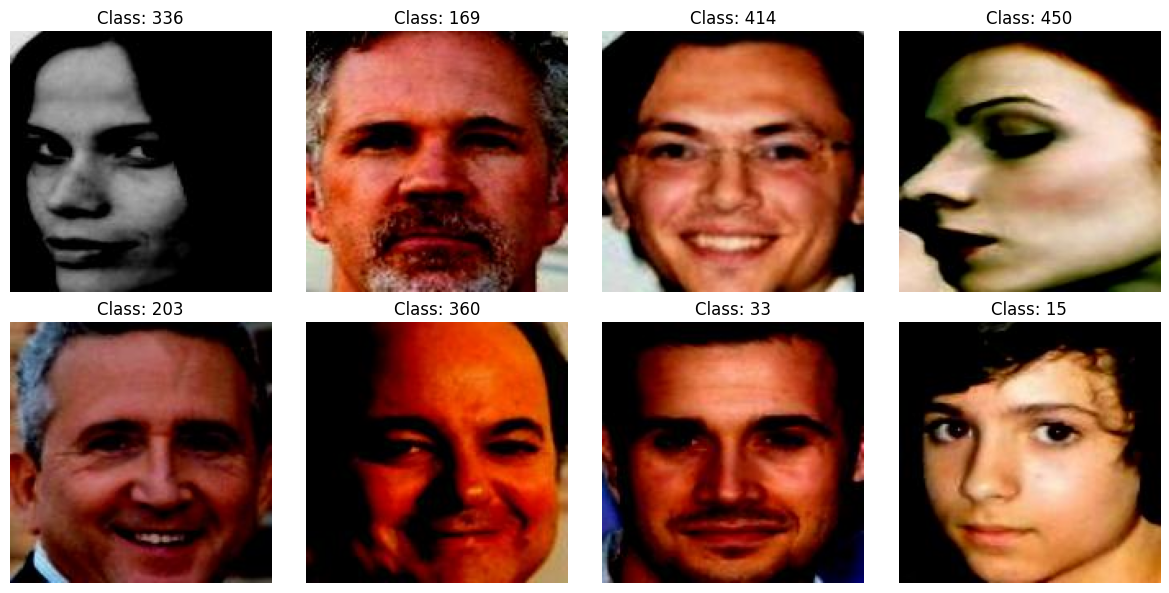

In [1]:
import os
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np

# --- Path to dataset directory ---
data_dir = '/content/drive/MyDrive/Facial Payment System/Preprocessed'  # or Unseen_data

# --- Define Transform ---
transform = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.ToTensor()
])

# --- Load dataset ---
dataset = datasets.ImageFolder(root=data_dir, transform=transform)
loader = DataLoader(dataset, batch_size=16, shuffle=True)

# --- Visualize a batch ---
images, labels = next(iter(loader))

# --- Show images ---
def imshow(img_tensor):
    img = img_tensor.numpy().transpose((1, 2, 0))  # CHW -> HWC
    img = np.clip(img, 0, 1)  # Make sure pixel values are valid
    plt.imshow(img)
    plt.axis('off')

# Plot 8 images
plt.figure(figsize=(12, 6))
for i in range(8):
    plt.subplot(2, 4, i+1)
    imshow(images[i])
    plt.title(f"Class: {labels[i].item()}")
plt.tight_layout()
plt.show()

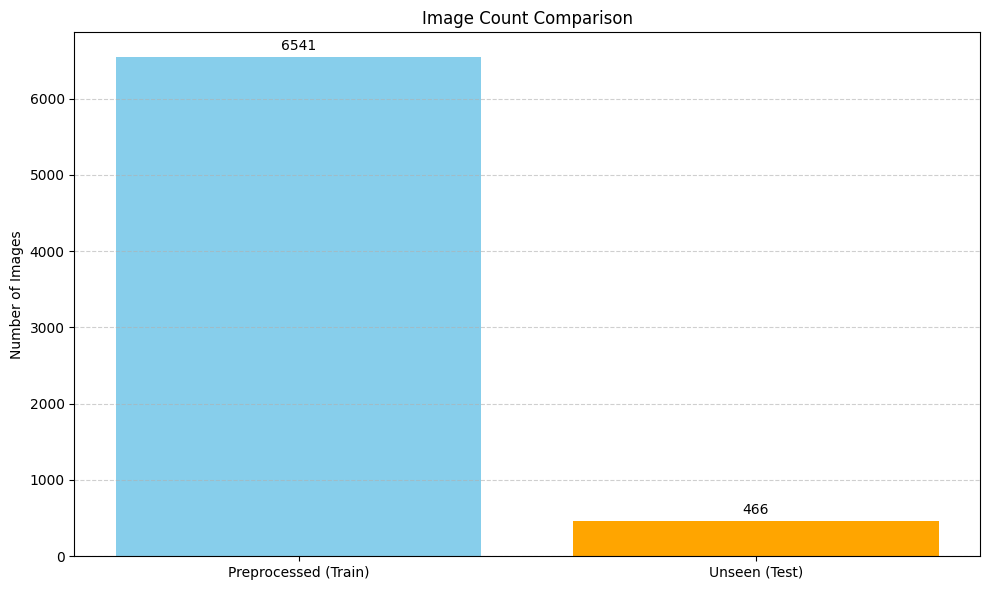

In [5]:
import os
import matplotlib.pyplot as plt
from torchvision import datasets

# Set your paths
preprocessed_path = '/content/drive/MyDrive/Facial Payment System/Preprocessed'
unseen_path = '/content/drive/MyDrive/Facial Payment System/Unseen_data'

# Count images in each dataset
def count_images(data_path):
    dataset = datasets.ImageFolder(data_path)
    return len(dataset)

preprocessed_count = count_images(preprocessed_path)
unseen_count = count_images(unseen_path)

# Plotting
labels = ['Preprocessed (Train)', 'Unseen (Test)']
counts = [preprocessed_count, unseen_count]
colors = ['skyblue', 'orange']

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, counts, color=colors)

# Add counts on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 50, f'{yval}', ha='center', va='bottom', fontsize=10)

plt.title('Image Count Comparison')
plt.ylabel('Number of Images')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Model Training

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from facenet_pytorch import InceptionResnetV1
import torch
import torch.nn.functional as F

# --- Triplet Loss ---
class TripletLoss(torch.nn.Module):
    def __init__(self, margin=0.5):
        super(TripletLoss, self).__init__()
        self.margin = margin

    def forward(self, embeddings, labels):
        dist = torch.cdist(embeddings, embeddings, p=2)
        labels = labels.unsqueeze(1)
        label_equal = (labels == labels.t()).float()
        label_not_equal = 1 - label_equal

        pos_dist = dist * label_equal
        hardest_pos = pos_dist.max(1)[0]

        neg_dist = dist * label_not_equal + (label_equal * 1e6)
        hardest_neg = neg_dist.min(1)[0]

        loss = F.relu(hardest_pos - hardest_neg + self.margin).mean()
        return loss

# --- Accuracy function (only used once per epoch) ---
def batch_accuracy(embeddings, labels, threshold=0.5):
    norm_embeddings = F.normalize(embeddings, p=2, dim=1)
    similarity = torch.matmul(norm_embeddings, norm_embeddings.t())

    labels = labels.unsqueeze(1)
    same_mask = (labels == labels.t()).float()
    diff_mask = 1 - same_mask
    diag_mask = torch.eye(same_mask.shape[0], device=same_mask.device)

    same_mask -= diag_mask

    same_correct = ((similarity >= threshold).float() * same_mask).sum()
    diff_correct = ((similarity < threshold).float() * diff_mask).sum()

    same_total = same_mask.sum()
    diff_total = diff_mask.sum()

    same_acc = same_correct / same_total if same_total > 0 else torch.tensor(0.0)
    diff_acc = diff_correct / diff_total if diff_total > 0 else torch.tensor(0.0)

    return same_acc.item(), diff_acc.item()

In [ ]:
# Paths and parameters
aligned_data_dir = '/content/drive/MyDrive/Facial Payment System/Preprocessed'
model_save_path = '/content/drive/MyDrive/Facial Payment System/facenet3.pth'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define transforms
transform = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# --- Dataset & Loader ---
dataset = datasets.ImageFolder(aligned_data_dir, transform=transform)
loader = DataLoader(dataset, batch_size=8, shuffle=True, num_workers=2, pin_memory=True)
print(f"Loaded {len(dataset)} images across {len(dataset.classes)} classes.")

# --- Model Setup ---
model = InceptionResnetV1(pretrained='vggface2').to(device)
model.train()
loss_fn = TripletLoss(margin=0.5)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

# --- Training ---
epochs = 5
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for imgs, labels in loader:
        imgs, labels = imgs.to(device), labels.to(device)

        embeddings = model(imgs)
        loss = loss_fn(embeddings, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Eval accuracy (optional, once per epoch)
    model.eval()
    all_embeddings, all_labels = [], []
    with torch.no_grad():
        for imgs, labels in loader:
            imgs = imgs.to(device)
            emb = model(imgs)
            all_embeddings.append(emb)
            all_labels.append(labels.to(device))
    all_embeddings = torch.cat(all_embeddings)
    all_labels = torch.cat(all_labels)

    same_acc, diff_acc = batch_accuracy(all_embeddings, all_labels)

    print(f"Epoch {epoch+1}/{epochs} | Loss: {total_loss/len(loader):.4f} | Same_acc: {same_acc*100:.2f}% | Diff_acc: {diff_acc*100:.2f}%")

Loaded 4986 images across 500 classes.


  0%|          | 0.00/107M [00:00<?, ?B/s]

Epoch 1/5 | Loss: 0.0076 | Same_acc: 25.45% | Diff_acc: 84.12%
Epoch 2/5 | Loss: 0.0113 | Same_acc: 27.29% | Diff_acc: 83.91%
Epoch 3/5 | Loss: 0.0094 | Same_acc: 31.16% | Diff_acc: 79.16%
Epoch 4/5 | Loss: 0.0086 | Same_acc: 30.03% | Diff_acc: 79.01%
Epoch 5/5 | Loss: 0.0070 | Same_acc: 29.23% | Diff_acc: 79.46%


In [ ]:
# Remove any empty folders before loading the dataset
for folder in os.listdir(aligned_data_dir):
    folder_path = os.path.join(aligned_data_dir, folder)
    if os.path.isdir(folder_path) and not os.listdir(folder_path):
        print(f"üóëÔ∏è Removing empty folder: {folder}")
        os.rmdir(folder_path)

üóëÔ∏è Removing empty folder: 2103
üóëÔ∏è Removing empty folder: 8045
üóëÔ∏è Removing empty folder: 4577
üóëÔ∏è Removing empty folder: 9967
üóëÔ∏è Removing empty folder: 5090
üóëÔ∏è Removing empty folder: 2871


In [ ]:
# Paths and parameters
aligned_data_dir = '/content/drive/MyDrive/Facial Payment System/Preprocessed'
model_save_path = '/content/drive/MyDrive/Facial Payment System/facenet3.pth'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define transforms
transform = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# --- Dataset & Loader ---
dataset = datasets.ImageFolder(aligned_data_dir, transform=transform)
loader = DataLoader(dataset, batch_size=16,shuffle=True, num_workers=2, pin_memory=True)
print(f"Loaded {len(dataset)} images across {len(dataset.classes)} classes.")

# --- Model Setup ---
model = InceptionResnetV1(pretrained='vggface2').to(device)
model.train()
loss_fn = TripletLoss(margin=0.5)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

# --- Training ---
epochs = 15
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for imgs, labels in loader:
        imgs, labels = imgs.to(device), labels.to(device)

        embeddings = model(imgs)
        loss = loss_fn(embeddings, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Eval accuracy (optional, once per epoch)
    model.eval()
    all_embeddings, all_labels = [], []
    with torch.no_grad():
        for imgs, labels in loader:
            imgs = imgs.to(device)
            emb = model(imgs)
            all_embeddings.append(emb)
            all_labels.append(labels.to(device))
    all_embeddings = torch.cat(all_embeddings)
    all_labels = torch.cat(all_labels)

    same_acc, diff_acc = batch_accuracy(all_embeddings, all_labels)

    print(f"Epoch {epoch+1}/{epochs} | Loss: {total_loss/len(loader):.4f} | Same_acc: {same_acc*100:.2f}% | Diff_acc: {diff_acc*100:.2f}%")

Loaded 6541 images across 494 classes.


  0%|          | 0.00/107M [00:00<?, ?B/s]

Epoch 1/15 | Loss: 0.0210 | Same_acc: 38.88% | Diff_acc: 89.58%
Epoch 2/15 | Loss: 0.0181 | Same_acc: 34.67% | Diff_acc: 91.72%
Epoch 3/15 | Loss: 0.0223 | Same_acc: 40.92% | Diff_acc: 83.08%
Epoch 4/15 | Loss: 0.0218 | Same_acc: 33.40% | Diff_acc: 91.35%
Epoch 5/15 | Loss: 0.0209 | Same_acc: 30.64% | Diff_acc: 89.91%
Epoch 6/15 | Loss: 0.0236 | Same_acc: 38.94% | Diff_acc: 85.45%
Epoch 7/15 | Loss: 0.0224 | Same_acc: 39.71% | Diff_acc: 87.71%
Epoch 8/15 | Loss: 0.0199 | Same_acc: 36.56% | Diff_acc: 89.08%
Epoch 9/15 | Loss: 0.0207 | Same_acc: 44.40% | Diff_acc: 84.88%
Epoch 10/15 | Loss: 0.0218 | Same_acc: 40.58% | Diff_acc: 85.33%
Epoch 11/15 | Loss: 0.0166 | Same_acc: 41.11% | Diff_acc: 82.32%
Epoch 12/15 | Loss: 0.0225 | Same_acc: 40.65% | Diff_acc: 85.41%
Epoch 13/15 | Loss: 0.0236 | Same_acc: 42.08% | Diff_acc: 84.72%
Epoch 14/15 | Loss: 0.0212 | Same_acc: 40.80% | Diff_acc: 84.77%


In [ ]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from facenet_pytorch import InceptionResnetV1
import torch.nn.functional as F

# TripletLoss and batch_accuracy definitions assumed to be defined earlier

# --- Paths and parameters ---
aligned_data_dir = '/content/drive/MyDrive/Facial Payment System/Preprocessed'
model_save_path = '/content/drive/MyDrive/Facial Payment System/facenet_best.pth'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# --- Transforms ---
transform = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# --- Dataset & Loader ---
dataset = datasets.ImageFolder(aligned_data_dir, transform=transform)
loader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=2, pin_memory=True)
print(f"Loaded {len(dataset)} images across {len(dataset.classes)} classes.")

# --- Model Setup ---
model = InceptionResnetV1(pretrained='vggface2').to(device)
model.train()
loss_fn = TripletLoss(margin=0.5)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

# --- Training ---
epochs = 5
best_same_acc = 0.0  # üëà track best same-person accuracy

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for imgs, labels in loader:
        imgs, labels = imgs.to(device), labels.to(device)

        embeddings = model(imgs)
        loss = loss_fn(embeddings, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # --- Evaluate ---
    model.eval()
    all_embeddings, all_labels = [], []
    with torch.no_grad():
        for imgs, labels in loader:
            imgs = imgs.to(device)
            emb = model(imgs)
            all_embeddings.append(emb)
            all_labels.append(labels.to(device))

    all_embeddings = torch.cat(all_embeddings)
    all_labels = torch.cat(all_labels)

    same_acc, diff_acc = batch_accuracy(all_embeddings, all_labels)
    avg_loss = total_loss / len(loader)

    print(f"Epoch {epoch+1}/{epochs} | Loss: {avg_loss:.4f} | Same_acc: {same_acc*100:.2f}% | Diff_acc: {diff_acc*100:.2f}%")

    # --- Save model if Same_acc improves ---
    if same_acc > best_same_acc:
        best_same_acc = same_acc
        torch.save(model.state_dict(), model_save_path)
        print(f"Model saved at epoch {epoch+1} with Same_acc = {same_acc*100:.2f}%")

Loaded 6541 images across 494 classes.
Epoch 1/5 | Loss: 0.0206 | Same_acc: 34.58% | Diff_acc: 92.90%
Model saved at epoch 1 with Same_acc = 34.58%
Epoch 2/5 | Loss: 0.0225 | Same_acc: 33.49% | Diff_acc: 94.09%
Epoch 3/5 | Loss: 0.0189 | Same_acc: 37.09% | Diff_acc: 91.56%
Model saved at epoch 3 with Same_acc = 37.09%
Epoch 4/5 | Loss: 0.0176 | Same_acc: 36.75% | Diff_acc: 91.47%
Epoch 5/5 | Loss: 0.0226 | Same_acc: 41.59% | Diff_acc: 88.53%
Model saved at epoch 5 with Same_acc = 41.59%


In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from facenet_pytorch import InceptionResnetV1
import torch.nn.functional as F
import os
import csv

# --- Paths and Parameters ---
aligned_data_dir = '/content/drive/MyDrive/Facial Payment System/Preprocessed'
model_save_path = '/content/drive/MyDrive/Facial Payment System/facenet_best.pth'
log_path = '/content/drive/MyDrive/Facial Payment System/training_log.csv'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# --- Transforms ---
transform = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# --- Dataset & Dataloader ---
dataset = datasets.ImageFolder(aligned_data_dir, transform=transform)
loader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=2, pin_memory=True)
print(f"Loaded {len(dataset)} images across {len(dataset.classes)} classes.")

# --- Load model ---
model = InceptionResnetV1(pretrained='vggface2').to(device)
model.load_state_dict(torch.load(model_save_path))  # Load best model so far
model.train()

# --- Loss + Optimizer ---
loss_fn = TripletLoss(margin=0.5)
optimizer = torch.optim.Adam(model.parameters(), lr=5e-5)  # Reduced LR

# --- Training Params ---
start_epoch = 6
end_epoch = 15
best_same_acc = 0.4159  # Based on your last best accuracy (41.59%)

# --- Initialize CSV Log File ---
if not os.path.exists(log_path):
    with open(log_path, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['Epoch', 'Loss', 'Same_Accuracy', 'Diff_Accuracy'])

# --- Training Loop ---
for epoch in range(start_epoch, end_epoch + 1):
    model.train()
    total_loss = 0
    for imgs, labels in loader:
        imgs, labels = imgs.to(device), labels.to(device)

        embeddings = model(imgs)
        loss = loss_fn(embeddings, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    # --- Evaluation ---
    model.eval()
    all_embeddings, all_labels = [], []
    with torch.no_grad():
        for imgs, labels in loader:
            imgs = imgs.to(device)
            emb = model(imgs)
            all_embeddings.append(emb)
            all_labels.append(labels.to(device))

    all_embeddings = torch.cat(all_embeddings)
    all_labels = torch.cat(all_labels)
    same_acc, diff_acc = batch_accuracy(all_embeddings, all_labels)
    avg_loss = total_loss / len(loader)

    print(f"Epoch {epoch}/{end_epoch} | Loss: {avg_loss:.4f} | Same_acc: {same_acc*100:.2f}% | Diff_acc: {diff_acc*100:.2f}%")

    # --- Save Best Model ---
    if same_acc > best_same_acc:
        best_same_acc = same_acc
        torch.save(model.state_dict(), model_save_path)
        print(f"Model saved at epoch {epoch} with Same_acc = {same_acc*100:.2f}%")

    # --- Save to CSV log ---
    with open(log_path, 'a', newline='') as f:
        writer = csv.writer(f)
        writer.writerow([epoch, round(avg_loss, 4), round(same_acc * 100, 2), round(diff_acc * 100, 2)])

Loaded 6541 images across 494 classes.
Epoch 6/15 | Loss: 0.0201 | Same_acc: 39.46% | Diff_acc: 90.32%
Epoch 7/15 | Loss: 0.0221 | Same_acc: 42.75% | Diff_acc: 90.56%
Model saved at epoch 7 with Same_acc = 42.75%
Epoch 8/15 | Loss: 0.0254 | Same_acc: 47.00% | Diff_acc: 89.21%
Model saved at epoch 8 with Same_acc = 47.00%
Epoch 9/15 | Loss: 0.0212 | Same_acc: 48.31% | Diff_acc: 89.74%
Model saved at epoch 9 with Same_acc = 48.31%
Epoch 10/15 | Loss: 0.0189 | Same_acc: 48.07% | Diff_acc: 89.12%
Epoch 11/15 | Loss: 0.0205 | Same_acc: 46.87% | Diff_acc: 89.40%
Epoch 12/15 | Loss: 0.0181 | Same_acc: 43.27% | Diff_acc: 90.84%
Epoch 13/15 | Loss: 0.0189 | Same_acc: 49.24% | Diff_acc: 90.06%
Model saved at epoch 13 with Same_acc = 49.24%
Epoch 14/15 | Loss: 0.0195 | Same_acc: 46.06% | Diff_acc: 90.37%
Epoch 15/15 | Loss: 0.0239 | Same_acc: 51.99% | Diff_acc: 88.75%
Model saved at epoch 15 with Same_acc = 51.99%


In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from facenet_pytorch import InceptionResnetV1
import torch.nn.functional as F
import os
import csv

# --- Paths and Parameters ---
aligned_data_dir = '/content/drive/MyDrive/Facial Payment System/Preprocessed'
model_save_path = '/content/drive/MyDrive/Facial Payment System/facenet_best.pth'
log_path = '/content/drive/MyDrive/Facial Payment System/training_log.csv'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# --- Transforms ---
transform = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# --- Dataset & Dataloader ---
dataset = datasets.ImageFolder(aligned_data_dir, transform=transform)
loader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=2, pin_memory=True)
print(f"Loaded {len(dataset)} images across {len(dataset.classes)} classes.")

# --- Load model ---
model = InceptionResnetV1(pretrained='vggface2').to(device)
model.load_state_dict(torch.load(model_save_path, map_location=device))
model.train()

# --- Loss + Optimizer ---
loss_fn = TripletLoss(margin=0.5)
optimizer = torch.optim.Adam(model.parameters(), lr=5e-5)  # Reduced LR

# --- Training Params ---
start_epoch = 16
end_epoch = 30
best_same_acc = 0.5199

# --- Initialize CSV Log File ---
if not os.path.exists(log_path):
    with open(log_path, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['Epoch', 'Loss', 'Same_Accuracy', 'Diff_Accuracy'])

# --- Training Loop ---
for epoch in range(start_epoch, end_epoch + 1):
    model.train()
    total_loss = 0
    for imgs, labels in loader:
        imgs, labels = imgs.to(device), labels.to(device)

        embeddings = model(imgs)
        loss = loss_fn(embeddings, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    # --- Evaluation ---
    model.eval()
    all_embeddings, all_labels = [], []
    with torch.no_grad():
        for imgs, labels in loader:
            imgs = imgs.to(device)
            emb = model(imgs)
            all_embeddings.append(emb)
            all_labels.append(labels.to(device))

    all_embeddings = torch.cat(all_embeddings)
    all_labels = torch.cat(all_labels)
    same_acc, diff_acc = batch_accuracy(all_embeddings, all_labels)
    avg_loss = total_loss / len(loader)

    print(f"Epoch {epoch}/{end_epoch} | Loss: {avg_loss:.4f} | Same_acc: {same_acc*100:.2f}% | Diff_acc: {diff_acc*100:.2f}%")

    # --- Save Best Model ---
    if same_acc > best_same_acc:
        best_same_acc = same_acc
        torch.save(model.state_dict(), model_save_path)
        print(f"Model saved at epoch {epoch} with Same_acc = {same_acc*100:.2f}% and Diff_acc = {diff_acc * 100:.2f}%")

    # --- Save to CSV log ---
    with open(log_path, 'a', newline='') as f:
        writer = csv.writer(f)
        writer.writerow([epoch, round(avg_loss, 4), round(same_acc * 100, 2), round(diff_acc * 100, 2)])

Loaded 6541 images across 494 classes.
Epoch 16/30 | Loss: 0.0195 | Same_acc: 55.13% | Diff_acc: 88.22%
Model saved at epoch 16 with Same_acc = 55.13% and Diff_acc = 88.22%
Epoch 17/30 | Loss: 0.0201 | Same_acc: 54.30% | Diff_acc: 89.21%
Epoch 18/30 | Loss: 0.0195 | Same_acc: 53.22% | Diff_acc: 88.63%
Epoch 19/30 | Loss: 0.0218 | Same_acc: 50.45% | Diff_acc: 90.42%
Epoch 20/30 | Loss: 0.0214 | Same_acc: 55.21% | Diff_acc: 88.80%
Model saved at epoch 20 with Same_acc = 55.21% and Diff_acc = 88.80%
Epoch 21/30 | Loss: 0.0215 | Same_acc: 53.82% | Diff_acc: 88.64%
Epoch 22/30 | Loss: 0.0218 | Same_acc: 54.36% | Diff_acc: 88.50%
Epoch 23/30 | Loss: 0.0182 | Same_acc: 54.16% | Diff_acc: 89.46%
Epoch 24/30 | Loss: 0.0187 | Same_acc: 56.12% | Diff_acc: 88.36%
Model saved at epoch 24 with Same_acc = 56.12% and Diff_acc = 88.36%
Epoch 25/30 | Loss: 0.0223 | Same_acc: 53.90% | Diff_acc: 88.68%
Epoch 26/30 | Loss: 0.0216 | Same_acc: 57.92% | Diff_acc: 87.72%
Model saved at epoch 26 with Same_acc =

In [20]:
import torch
import pickle
from facenet_pytorch import InceptionResnetV1

# --- Paths ---
pth_path = '/content/drive/MyDrive/Facial Payment System/facenet_best.pth'
pkl_path = '/content/drive/MyDrive/Facial Payment System/facenet_best.pkl'

# --- Load model weights ---
model = InceptionResnetV1(pretrained='vggface2')
model.load_state_dict(torch.load(pth_path, map_location='cpu'))

# --- Save as pickle ---
with open(pkl_path, 'wb') as f:
    pickle.dump(model.state_dict(), f)

print(f"Model saved as pickle at: {pkl_path}")

Model saved as pickle at: /content/drive/MyDrive/Facial Payment System/facenet_best.pkl


# Model Evalution on Unseen Data

In [35]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from facenet_pytorch import InceptionResnetV1
import numpy as np
import random

# --- Paths ---
unseen_data_path = '/content/drive/MyDrive/Facial Payment System/Unseen_data'
model_path = '/content/drive/MyDrive/Facial Payment System/facenet_best.pth'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# --- Load model ---
model = InceptionResnetV1(pretrained='vggface2').to(device)
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()

# --- Load unseen dataset ---
transform = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])
dataset = datasets.ImageFolder(unseen_data_path, transform=transform)
print(f"Loaded {len(dataset)} unseen images from {len(dataset.classes)} classes.")

# --- Helper function ---
def cosine_sim(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

# --- Evaluation parameters ---
num_pairs = 200
threshold = 0.5

same_total = 0
same_correct = 0
same_incorrect = 0
diff_total = 0
diff_incorrect = 0

# --- Group image indices by class ---
class_to_indices = {}
for idx, (_, label) in enumerate(dataset.samples):
    class_to_indices.setdefault(label, []).append(idx)

# --- SAME person pairs ---
for _ in range(num_pairs):
    label = random.choice([k for k in class_to_indices if len(class_to_indices[k]) >= 2])
    idx1, idx2 = random.sample(class_to_indices[label], 2)

    img1, _ = dataset[idx1]
    img2, _ = dataset[idx2]
    img1 = img1.unsqueeze(0).to(device)
    img2 = img2.unsqueeze(0).to(device)

    emb1 = model(img1).detach().cpu().numpy()[0]
    emb2 = model(img2).detach().cpu().numpy()[0]
    sim = cosine_sim(emb1, emb2)

    same_total += 1
    if sim >= threshold:
        same_correct += 1
    else:
        same_incorrect += 1  # false reject

# --- DIFFERENT person pairs ---
for _ in range(num_pairs):
    label1, label2 = random.sample(list(class_to_indices.keys()), 2)
    idx1 = random.choice(class_to_indices[label1])
    idx2 = random.choice(class_to_indices[label2])

    img1, _ = dataset[idx1]
    img2, _ = dataset[idx2]
    img1 = img1.unsqueeze(0).to(device)
    img2 = img2.unsqueeze(0).to(device)

    emb1 = model(img1).detach().cpu().numpy()[0]
    emb2 = model(img2).detach().cpu().numpy()[0]
    sim = cosine_sim(emb1, emb2)

    diff_total += 1
    if sim >= threshold:
        diff_incorrect += 1  # false accept

# --- Metrics ---
msr = (same_correct / same_total) * 100
far = (diff_incorrect / diff_total) * 100
frr = (same_incorrect / same_total) * 100

print("\nEvaluation Results on Unseen Data:")
print(f"Match Success Rate (MSR): {msr:.2f}%")
print(f"False Acceptance Rate (FAR): {far:.2f}%")
print(f"False Rejection Rate (FRR): {frr:.2f}%")

Loaded 466 unseen images from 11 classes.

Evaluation Results on Unseen Data:
Match Success Rate (MSR): 73.00%
False Acceptance Rate (FAR): 43.50%
False Rejection Rate (FRR): 27.00%


In [2]:
thresholds = [0.45, 0.50, 0.55, 0.60, 0.65, 0.70]

for threshold in thresholds:
    same_total = 0
    same_correct = 0
    same_incorrect = 0
    diff_total = 0
    diff_incorrect = 0

    # --- SAME person pairs ---
    for _ in range(200):
        label = random.choice([k for k in class_to_indices if len(class_to_indices[k]) >= 2])
        idx1, idx2 = random.sample(class_to_indices[label], 2)

        img1, _ = dataset[idx1]
        img2, _ = dataset[idx2]
        img1 = img1.unsqueeze(0).to(device)
        img2 = img2.unsqueeze(0).to(device)

        emb1 = model(img1).detach().cpu().numpy()[0]
        emb2 = model(img2).detach().cpu().numpy()[0]
        sim = cosine_sim(emb1, emb2)

        same_total += 1
        if sim >= threshold:
            same_correct += 1
        else:
            same_incorrect += 1  # false reject

    # --- DIFFERENT person pairs ---
    for _ in range(200):
        label1, label2 = random.sample(list(class_to_indices.keys()), 2)
        idx1 = random.choice(class_to_indices[label1])
        idx2 = random.choice(class_to_indices[label2])

        img1, _ = dataset[idx1]
        img2, _ = dataset[idx2]
        img1 = img1.unsqueeze(0).to(device)
        img2 = img2.unsqueeze(0).to(device)

        emb1 = model(img1).detach().cpu().numpy()[0]
        emb2 = model(img2).detach().cpu().numpy()[0]
        sim = cosine_sim(emb1, emb2)

        diff_total += 1
        if sim >= threshold:
            diff_incorrect += 1  # false accept

    # --- Metrics ---
    msr = (same_correct / same_total) * 100
    far = (diff_incorrect / diff_total) * 100
    frr = (same_incorrect / same_total) * 100

    print(f"\nThreshold = {threshold}")
    print(f"Match Success Rate (MSR): {msr:.2f}%")
    print(f"False Acceptance Rate (FAR): {far:.2f}%")
    print(f"False Rejection Rate (FRR): {frr:.2f}%")


Threshold = 0.45
Match Success Rate (MSR): 83.00%
False Acceptance Rate (FAR): 49.00%
False Rejection Rate (FRR): 17.00%

Threshold = 0.5
Match Success Rate (MSR): 76.00%
False Acceptance Rate (FAR): 46.00%
False Rejection Rate (FRR): 24.00%

Threshold = 0.55
Match Success Rate (MSR): 71.50%
False Acceptance Rate (FAR): 36.00%
False Rejection Rate (FRR): 28.50%

Threshold = 0.6
Match Success Rate (MSR): 59.50%
False Acceptance Rate (FAR): 32.50%
False Rejection Rate (FRR): 40.50%

Threshold = 0.65
Match Success Rate (MSR): 56.50%
False Acceptance Rate (FAR): 26.50%
False Rejection Rate (FRR): 43.50%

Threshold = 0.7
Match Success Rate (MSR): 47.50%
False Acceptance Rate (FAR): 14.50%
False Rejection Rate (FRR): 52.50%


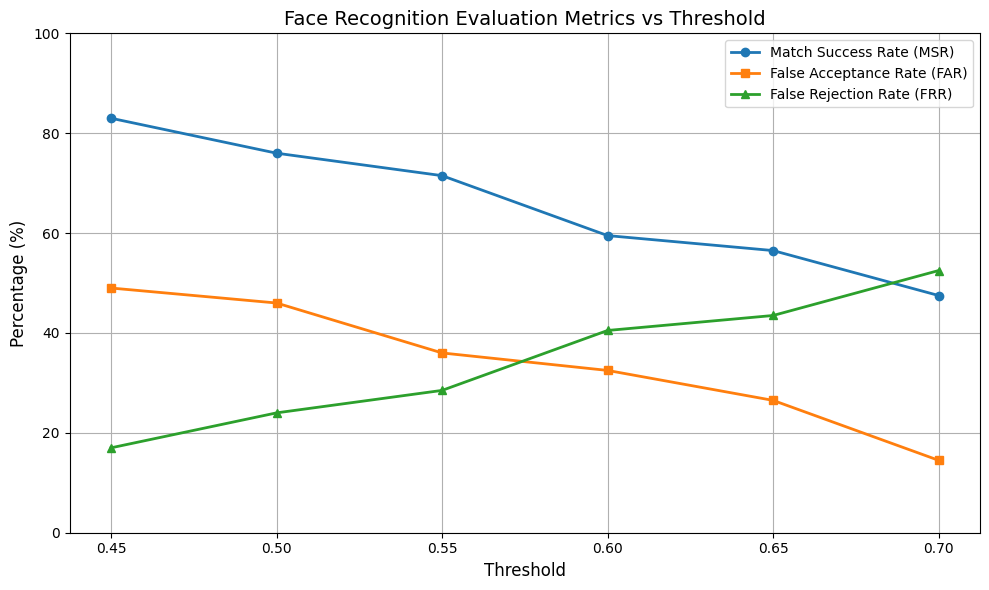

In [3]:
import matplotlib.pyplot as plt

# --- Threshold values you tested ---
thresholds = [0.45, 0.5, 0.55, 0.6, 0.65, 0.7]

# --- Your recorded metrics from each threshold ---
msr = [83.00, 76.00, 71.50, 59.50, 56.50, 47.50]
far = [49.00, 46.00, 36.00, 32.50, 26.50, 14.50]
frr = [17.00, 24.00, 28.50, 40.50, 43.50, 52.50]

# --- Plotting ---
plt.figure(figsize=(10, 6))
plt.plot(thresholds, msr, marker='o', label='Match Success Rate (MSR)', linewidth=2)
plt.plot(thresholds, far, marker='s', label='False Acceptance Rate (FAR)', linewidth=2)
plt.plot(thresholds, frr, marker='^', label='False Rejection Rate (FRR)', linewidth=2)

plt.xlabel("Threshold", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.title("Face Recognition Evaluation Metrics vs Threshold", fontsize=14)
plt.grid(True)
plt.legend()
plt.xticks(thresholds)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

  0%|          | 0.00/107M [00:00<?, ?B/s]

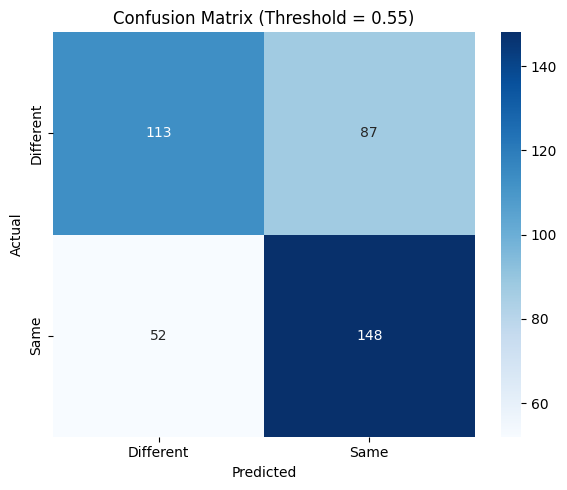

In [1]:
import torch
from torchvision import datasets, transforms
from facenet_pytorch import InceptionResnetV1
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# --- Paths ---
unseen_data_path = '/content/drive/MyDrive/Facial Payment System/Unseen_data'
model_path = '/content/drive/MyDrive/Facial Payment System/facenet_best.pth'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# --- Load model ---
model = InceptionResnetV1(pretrained='vggface2').to(device)
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()

# --- Load dataset ---
transform = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])
dataset = datasets.ImageFolder(unseen_data_path, transform=transform)

# --- Cosine similarity function ---
def cosine_sim(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

# --- Evaluation ---
num_pairs = 200
threshold = 0.55

y_true = []  # actual
y_pred = []  # predicted

# Group by class
class_to_indices = {}
for idx, (_, label) in enumerate(dataset.samples):
    class_to_indices.setdefault(label, []).append(idx)

# SAME person pairs
for _ in range(num_pairs):
    label = random.choice([k for k in class_to_indices if len(class_to_indices[k]) >= 2])
    idx1, idx2 = random.sample(class_to_indices[label], 2)

    img1, _ = dataset[idx1]
    img2, _ = dataset[idx2]
    img1 = img1.unsqueeze(0).to(device)
    img2 = img2.unsqueeze(0).to(device)

    emb1 = model(img1).detach().cpu().numpy()[0]
    emb2 = model(img2).detach().cpu().numpy()[0]
    sim = cosine_sim(emb1, emb2)

    y_true.append(1)  # same
    y_pred.append(1 if sim >= threshold else 0)

# DIFFERENT person pairs
for _ in range(num_pairs):
    label1, label2 = random.sample(list(class_to_indices.keys()), 2)
    idx1 = random.choice(class_to_indices[label1])
    idx2 = random.choice(class_to_indices[label2])

    img1, _ = dataset[idx1]
    img2, _ = dataset[idx2]
    img1 = img1.unsqueeze(0).to(device)
    img2 = img2.unsqueeze(0).to(device)

    emb1 = model(img1).detach().cpu().numpy()[0]
    emb2 = model(img2).detach().cpu().numpy()[0]
    sim = cosine_sim(emb1, emb2)

    y_true.append(0)  # different
    y_pred.append(1 if sim >= threshold else 0)

# --- Confusion Matrix ---
cm = confusion_matrix(y_true, y_pred)
labels = ['Different', 'Same']

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Threshold = {threshold})')
plt.tight_layout()
plt.show()